# Subgenomic RNA Expression Plotting

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec

In my initials tests, I had added more than one genome for the reference virus file so now I have to seperate them into what is the best reference for each bam otherwise the reads from the other reference files will get tagged on too

In [ ]:
samtools view -@ 8 -b -e 'rname=="NC_001474.2_Dengue_virus_2_complete_genome"'  Dengue_virus_SRR5206482_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Dengue_virus_SRR5206482_sorted.bam

In [ ]:
samtools view -@ 8 -b -e 'rname=="NC_075569.1_Feline_calicivirus_complete_genome"' Feline_calicivirus_SRR16202396_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Feline_calicivirus_SRR16202396_sorted.bam

In [ ]:
samtools view -@ 8 -b -e 'rname=="NC_035889.1_Zika_virus_isolate_ZIKV/H._sapiens/Brazil/Natal/2015_complete_genome"' Zika_virus_ERR1802071_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Zika_virus_ERR1802071_sorted.bam

samtools view -@ 8 -b -e 'rname=="NC_035889.1_Zika_virus_isolate_ZIKV/H._sapiens/Brazil/Natal/2015_complete_genome"' Zika_virus_ERR1802074_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Zika_virus_ERR1802074_sorted.bam

In [ ]:
samtools view -@ 8 -b -e 'rname=="NC_012532.1_Zika_virus_complete_genome"' Zika_virus_SRR15923994_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Zika_virus_SRR15923994_sorted.bam

samtools view -@ 8 -b -e 'rname=="NC_012532.1_Zika_virus_complete_genome"' Zika_virus_SRR8155999_sorted.bam > /mnt/Subgenomic_plotting/original_bam_one_ref/Zika_virus_SRR8155999_sorted.bam

In [ ]:
cp Murine_norovirus_SRR6822148_sorted.bam /mnt/Subgenomic_plotting/original_bam_one_ref/Murine_norovirus_SRR6822148_sorted.bam
cp Porcine_sapovirus_SRR10071297_sorted.bam /mnt/Subgenomic_plotting/original_bam_one_ref/Porcine_sapovirus_SRR10071297_sorted.bam
cp Porcine_sapovirus_SRR10071298_sorted.bam /mnt/Subgenomic_plotting/original_bam_one_ref/Porcine_sapovirus_SRR10071298_sorted.bam

## Accession List

In [2]:
# Function to read numbers from a file and return them as a list
def read_acc_from_file(file_path):
    acc = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the newline character and convert the line to an integer
            accession = str(line.strip())
            acc.append(accession)
    return acc

# Example usage
file_path = '/mnt/Subgenomic_plotting/acc.txt'  # Replace with the path to your file
acc_list = read_acc_from_file(file_path)
print(acc_list)

['ERR1802071', 'ERR1802074', 'SRR8155999', 'SRR16202396', 'SRR15923994', 'SRR6822148', 'SRR10071297', 'SRR10071298', 'SRR5206482']


## Virus Genome Coverage Plot

Testing it with the Dengue Library 2.4 mb. This alignment was conducted with a reference genome that has multiple versions of the Dengue virus present in it. But this makes it harder to make this plotting work. And anyways, only one reference genome worked and the others did not have any reads align to it. So I am manually editing and removing the ~0 read reference virus genomes from the tsv file. For the future, I need to know the virus that is present in the library from before and use that as the genome for reference.

I tested it with one library. Now I am writing the script to do this on all libraries given an accession list.

In [3]:
%cd /mnt/Subgenomic_plotting/plotting/original_depth

/mnt/Subgenomic_plotting/plotting/original_depth


In [ ]:
cp final_alignment/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment2/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment3/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment4/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment5/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment6/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment7/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment8/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment9/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment_Aedes_albopictus_3/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment_crow/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/
cp final_alignment_hamster/hisat2/rseqc/infer_experiment/*.txt /mnt/Subgenomic_plotting/infer_exp/

In [ ]:
cd /mnt/Subgenomic_plotting/original_bam_one_ref/

#i am rerunning this with -a as I removed reads from unused reference sequences, however -aa keeps the depth as 0 for these sequences
for bam in $(ls *.bam | cat); do
mod_bam=${bam::-4}
samtools depth -a $bam > "/mnt/Subgenomic_plotting/plotting/original_depth/"$mod_bam".tsv"
done

In [4]:
depth = pd.read_csv("SRR10071297.tsv", sep="\t", names=["Virus", "Position", "Read Coverage"])

In [5]:
depth

Virus  Position  Read Coverage
0     KT922089.1         1              0
1     KT922089.1         2              0
2     KT922089.1         3              0
3     KT922089.1         4              0
4     KT922089.1         5              0
...          ...       ...            ...
7342  KT922089.1      7343            234
7343  KT922089.1      7344            226
7344  KT922089.1      7345            206
7345  KT922089.1      7346            113
7346  KT922089.1      7347             58

[7347 rows x 3 columns]

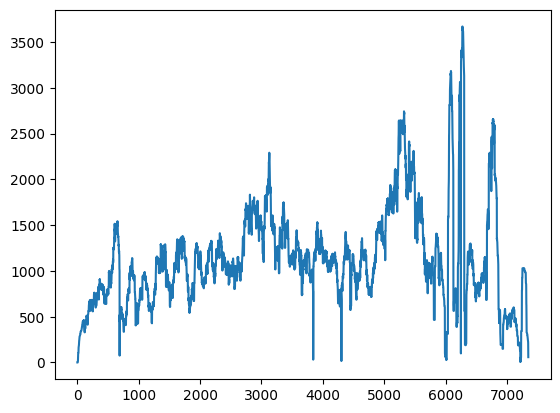

In [6]:
plt.plot(depth.iloc[:, 1], depth.iloc[:, 2])

# Adding title and labels


# Display the plot
plt.show()

In [7]:
depth['Read Coverage']

0         0
1         0
2         0
3         0
4         0
       ... 
7342    234
7343    226
7344    206
7345    113
7346     58
Name: Read Coverage, Length: 7347, dtype: int64

In [24]:
depth_av = depth['Read Coverage'].rolling(window=50, center=True).mean()

In [28]:
depth_av += 1000

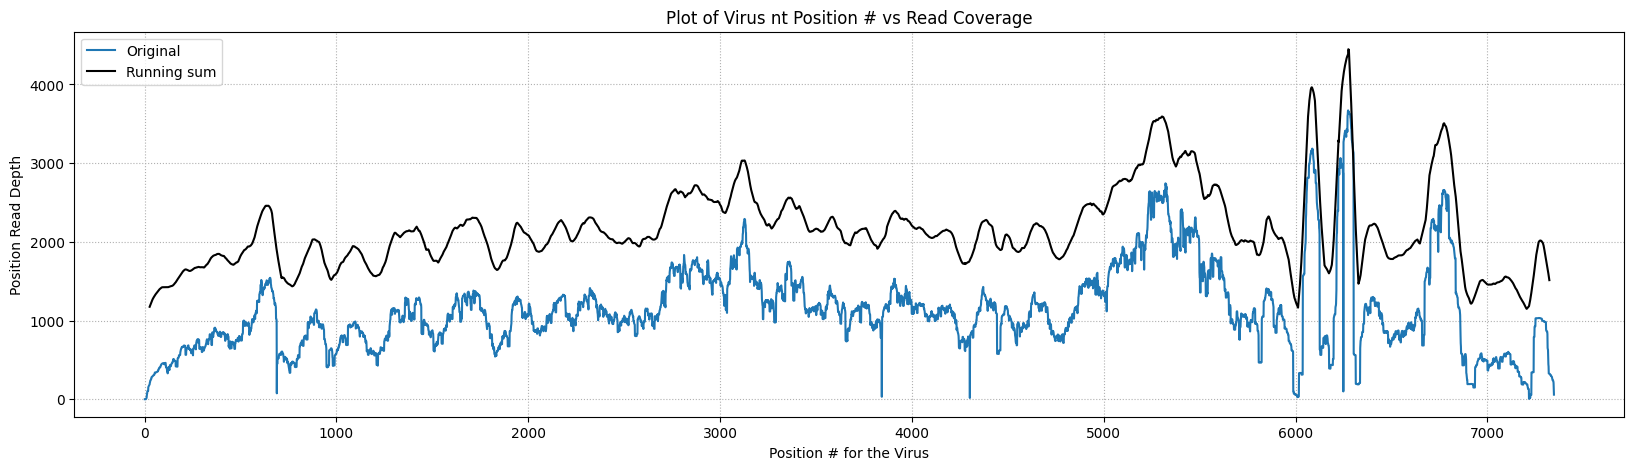

In [29]:
plt.figure(figsize=(20, 5))

plt.plot(depth.iloc[:, 1], depth.iloc[:, 2], label='Original')
plt.plot(depth.iloc[:, 1], depth_av, label='Running sum', color='black')
plt.title('Plot of Virus nt Position # vs Read Coverage')
plt.xlabel('Position # for the Virus')
plt.ylabel('Position Read Depth')
plt.grid(linestyle=':')
# plt.fill_between(depth_av.index, 0, depth_av, color='black', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

## Sense and Antisense read Seperation

In [ ]:
single() {
  if (( $(echo "$strand_one > $strand_two" | bc -l) )); then
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "++,--"
    samtools view -@ 8 -b -F 0x10 $p"_filtered.bam" > $p"_sense.bam"
    samtools view -@ 8 -b -f 0x10 $p"_filtered.bam" > $p"_antisense.bam"

    rm $p"_filtered.bam"
  else
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "+-,-+"
    samtools view -@ 8 -b -F 0x10 $p"_filtered.bam" > $p"_antisense.bam"
    samtools view -@ 8 -b -f 0x10 $p"_filtered.bam" > $p"_sense.bam"

    rm $p"_filtered.bam"
  fi
}

In [ ]:
paired() {
  if (( $(echo "$strand_one > $strand_two" | bc -l) )); then
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "1++,1--,2+-,2-+"
    samtools view -@ 8 -b -f 0x40 -F 0x10 $p"_filtered.bam" > $p"_sense_read1.bam"

    samtools view -@ 8 -b -f 0x40 -f 0x10 $p"_filtered.bam" > $p"_antisense_read1.bam"

    samtools view -@ 8 -b -f 0x80 -F 0x10 $p"_filtered.bam" > $p"_antisense_read2.bam"

    samtools view -@ 8 -b -f 0x80 -f 0x10 $p"_filtered.bam" > $p"_sense_read2.bam"

    samtools cat -o $p"_sense.bam" $p"_sense_read1.bam" $p"_sense_read2.bam"
    samtools cat -o $p"_antisense.bam" $p"_antisense_read1.bam" $p"_antisense_read2.bam"

    rm $p"_filtered.bam"
    rm $p"_sense_read1.bam"
    rm $p"_sense_read2.bam"
    rm $p"_antisense_read1.bam"
    rm $p"_antisense_read2.bam"

  else
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "1+-,1-+,2++,2--"

    samtools view -@ 8 -b -f 0x40 -F 0x10 $p"_filtered.bam" > $p"_antisense_read1.bam"

    samtools view -@ 8 -b -f 0x40 -f 0x10 $p"_filtered.bam" > $p"_sense_read1.bam"

    samtools view -@ 8 -b -f 0x80 -F 0x10 $p"_filtered.bam" > $p"_sense_read2.bam"

    samtools view -@ 8 -b -f 0x80 -f 0x10 $p"_filtered.bam" > $p"_antisense_read2.bam"

    samtools cat -o $p"_sense.bam" $p"_sense_read1.bam" $p"_sense_read2.bam"
    samtools cat -o $p"_antisense.bam" $p"_antisense_read1.bam" $p"_antisense_read2.bam"

    rm $p"_filtered.bam"
    rm $p"_sense_read1.bam"
    rm $p"_sense_read2.bam"
    rm $p"_antisense_read1.bam"
    rm $p"_antisense_read2.bam"

  fi
}

In [ ]:
while read p; do

#Extract if it is single-end or paired
data_type=$(grep -oP '^This is \K.*' "infer_exp/"$p".infer_experiment.txt")

if [ "$data_type" = "SingleEnd Data" ]; then
  echo "Single_$p"
  samtools view -@ 8 -b -q 10 "original_bam_one_ref/"*$p"_sorted.bam" > $p"_filtered.bam"

  strand_one=$(grep '++,--' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*++,--": \([0-9.]*\).*/\1/')
  strand_two=$(grep '+-,-+' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*+-,-+": \([0-9.]*\).*/\1/')

  single
  
else
  echo "Paired_$p"
  samtools view -@ 8 -b -f 0x2 -q 10 "original_bam_one_ref/"*$p"_sorted.bam" > $p"_filtered.bam"
  strand_one=$(grep '1++,1--,2+-,2-+' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*1++,1--,2+-,2-+": \([0-9.]*\).*/\1/')
  strand_two=$(grep '1+-,1-+,2++,2--' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*1+-,1-+,2++,2--": \([0-9.]*\).*/\1/')

  paired

fi

done < acc.txt

In [ ]:
mv *.bam bam_read_seperation/

In [ ]:
while read p; do
samtools sort -@ 8 "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_antisense.bam" > "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_antisense_sorted.bam"
samtools sort -@ 8 "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_sense.bam" > "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_sense_sorted.bam"
done < acc.txt

In [ ]:
while read p; do
rm "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_antisense.bam"
rm "/mnt/Subgenomic_plotting/bam_read_seperation/"$p"_sense.bam"
done < acc.txt

## Positive and Negative Read Coverage Plots

In [ ]:
cd /mnt/Subgenomic_plotting

while read p; do
  samtools depth -aa "bam_read_seperation/"$p"_sense_sorted.bam" > "/mnt/Subgenomic_plotting/plotting/positive_depth/"$p".tsv"
  samtools depth -aa "bam_read_seperation/"$p"_antisense_sorted.bam" > "/mnt/Subgenomic_plotting/plotting/negative_depth/"$p".tsv"
done < acc.txt

#i am rerunning this with -a as I removed reads from unused reference sequences, however -aa keeps the depth as 0 for these sequences
while read p; do
      samtools depth -a "bam_read_seperation/"$p"_sense_sorted.bam" > "/mnt/Subgenomic_plotting/plotting/positive_depth/"$p".tsv"
  samtools depth -a "bam_read_seperation/"$p"_antisense_sorted.bam" > "/mnt/Subgenomic_plotting/plotting/negative_depth/"$p".tsv"
done < acc.txt

In [3]:
%cd /mnt/Subgenomic_plotting/plotting

/mnt/Subgenomic_plotting/plotting


In [4]:
positive_depth = pd.read_csv("positive_depth/ERR1802071.tsv", sep="\t", names=["Virus", "Position", "Read Coverage"])
negative_depth = pd.read_csv("negative_depth/ERR1802071.tsv", sep="\t", names=["Virus", "Position", "Read Coverage"])

<Axes: title={'center': 'Sense Reads'}, xlabel='Position'>

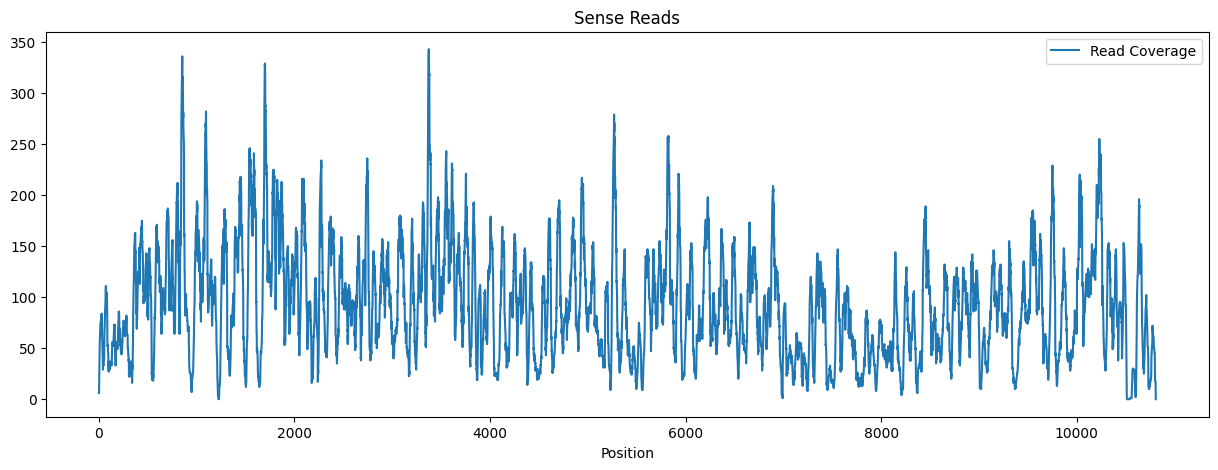

In [18]:
positive_depth.plot('Position', 'Read Coverage', title='Sense Reads', figsize=(15, 5))

<Axes: title={'center': 'Antisense Reads'}, xlabel='Position'>

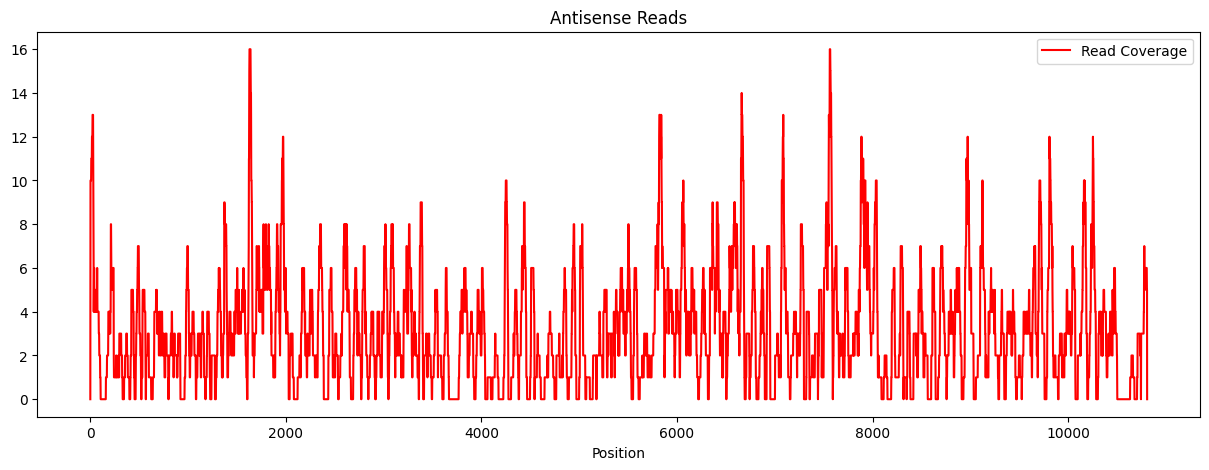

In [19]:
negative_depth.plot('Position', 'Read Coverage', title='Antisense Reads', figsize=(15, 5), colormap='autumn')

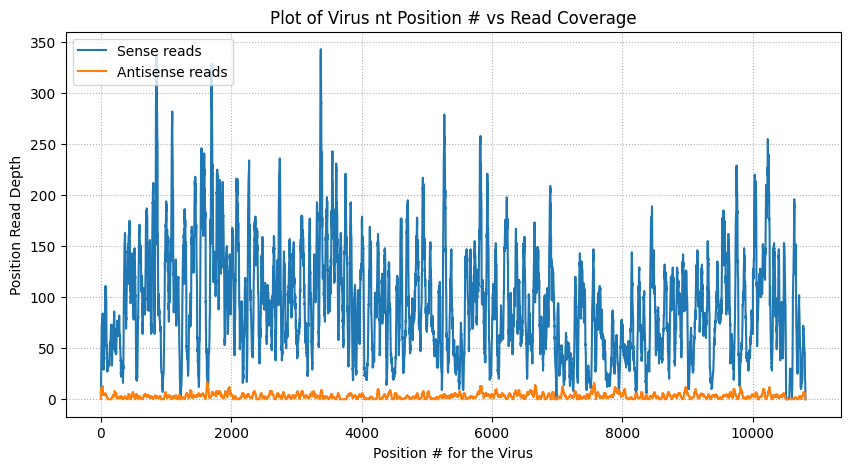

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(positive_depth.iloc[:, 1], positive_depth.iloc[:, 2], label='Sense reads')
plt.plot(negative_depth.iloc[:, 1], negative_depth.iloc[:, 2], label='Antisense reads')
plt.title('Plot of Virus nt Position # vs Read Coverage')
plt.xlabel('Position # for the Virus')
plt.ylabel('Position Read Depth')
plt.grid(linestyle=':')

plt.legend(loc='upper left')
plt.show()

## Positive and Negative 5' start points and 3' End points

In [ ]:
samtools view SRR10071298_antisense_sorted.bam | cut -f 4,6

In [ ]:
while read p; do

samtools view "bam_read_seperation/"$p"_sense_sorted.bam" | cut -f 4,6 > "read_start_end/"$p"_sense.tsv"
samtools view "bam_read_seperation/"$p"_antisense_sorted.bam" | cut -f 4,6 > "read_start_end/"$p"_antisense.tsv"

done < acc.txt

In [13]:
%cd /mnt/Subgenomic_plotting/read_start_end/

/mnt/Subgenomic_plotting/read_start_end


In [14]:
from cigar import Cigar

# Example function to apply
def cigar_len(x):
    return Cigar(x).reference_length()

Creating the edited tsv files where I convert CIGAR to Length

In [15]:
for i in acc_list:
    
    positive_start = pd.read_csv(i + "_sense.tsv", sep="\t", names=["Start", "CIGAR"])
    
    positive_start['Length'] = positive_start['CIGAR'].apply(cigar_len)
    positive_start['End'] = positive_start['Start'] + positive_start['Length']
    
    positive_start = positive_start.drop('Length', axis=1)
    positive_start = positive_start.drop('CIGAR', axis=1)
    
    positive_start.to_csv(i + "_sense_edited.tsv", sep="\t", header=True, index=False)
    
    
    negative_start = pd.read_csv(i + "_antisense.tsv", sep="\t", names=["Start", "CIGAR"])
    
    negative_start['Length'] = negative_start['CIGAR'].apply(cigar_len)
    negative_start['End'] = negative_start['Start'] + negative_start['Length']
    
    negative_start = negative_start.drop('Length', axis=1)
    negative_start = negative_start.drop('CIGAR', axis=1)
    
    negative_start.to_csv(i + "_antisense_edited.tsv", sep="\t", header=True, index=False)

Creating the plotting tsv files where I count the occurences of the start sites

In [24]:
for i in acc_list:
    original_depth = pd.read_csv("/mnt/Subgenomic_plotting/plotting/original_depth/" + i + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    full_range = pd.DataFrame({'Start': range(original_depth['Position'].min(), original_depth['Position'].max() + 1)})
    
    positive_start = pd.read_csv(i + "_sense_edited.tsv", sep="\t")
    negative_start = pd.read_csv(i + "_antisense_edited.tsv", sep="\t")
    
    counts_pos = positive_start['Start'].value_counts().reset_index()
    counts_neg = negative_start['Start'].value_counts().reset_index()
    
    # Rename the columns for clarity
    counts_pos.columns = ['Start', 'Count']
    counts_neg.columns = ['Start', 'Count']
    
    counts_pos = counts_pos.sort_values(by=['Start'])
    counts_neg = counts_neg.sort_values(by=['Start'])

    counts_pos_complete = pd.merge(full_range, counts_pos, on='Start', how='left').fillna(0)
    counts_neg_complete = pd.merge(full_range, counts_neg, on='Start', how='left').fillna(0)
    
    counts_neg_complete.to_csv("/mnt/Subgenomic_plotting/plotting/negative_start/" + i + ".tsv", sep="\t", header=False, index=False)
    counts_pos_complete.to_csv("/mnt/Subgenomic_plotting/plotting/positive_start/" + i + ".tsv", sep="\t", header=False, index=False)

In [25]:
for i in acc_list:
    original_depth = pd.read_csv("/mnt/Subgenomic_plotting/plotting/original_depth/" + i + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    full_range = pd.DataFrame({'End': range(original_depth['Position'].min(), original_depth['Position'].max() + 1)})
    
    positive_end = pd.read_csv(i + "_sense_edited.tsv", sep="\t")
    negative_end = pd.read_csv(i + "_antisense_edited.tsv", sep="\t")
    
    counts_pos = positive_end['End'].value_counts().reset_index()
    counts_neg = negative_end['End'].value_counts().reset_index()
    
    # Rename the columns for clarity
    counts_pos.columns = ['End', 'Count']
    counts_neg.columns = ['End', 'Count']
    
    counts_pos = counts_pos.sort_values(by=['End'])
    counts_neg = counts_neg.sort_values(by=['End'])

    counts_pos_complete = pd.merge(full_range, counts_pos, on='End', how='left').fillna(0)
    counts_neg_complete = pd.merge(full_range, counts_neg, on='End', how='left').fillna(0)
    
    counts_neg_complete.to_csv("/mnt/Subgenomic_plotting/plotting/negative_end/" + i + ".tsv", sep="\t", header=False, index=False)
    counts_pos_complete.to_csv("/mnt/Subgenomic_plotting/plotting/positive_end/" + i + ".tsv", sep="\t", header=False, index=False)

<Axes: title={'center': "Positive Read 5' End"}, xlabel='Position'>

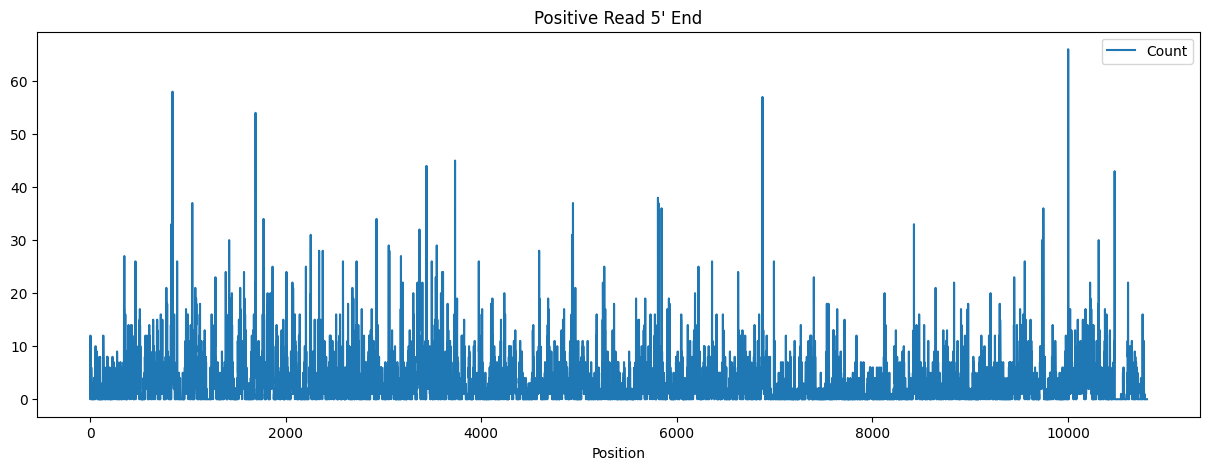

In [26]:
positive_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_start/ERR1802071.tsv", sep="\t", names=["Position", "Count"])
positive_start.plot('Position', 'Count', title='Positive Read 5\' End', figsize=(15, 5))

<Axes: title={'center': "Negative Read 5' End"}, xlabel='Position'>

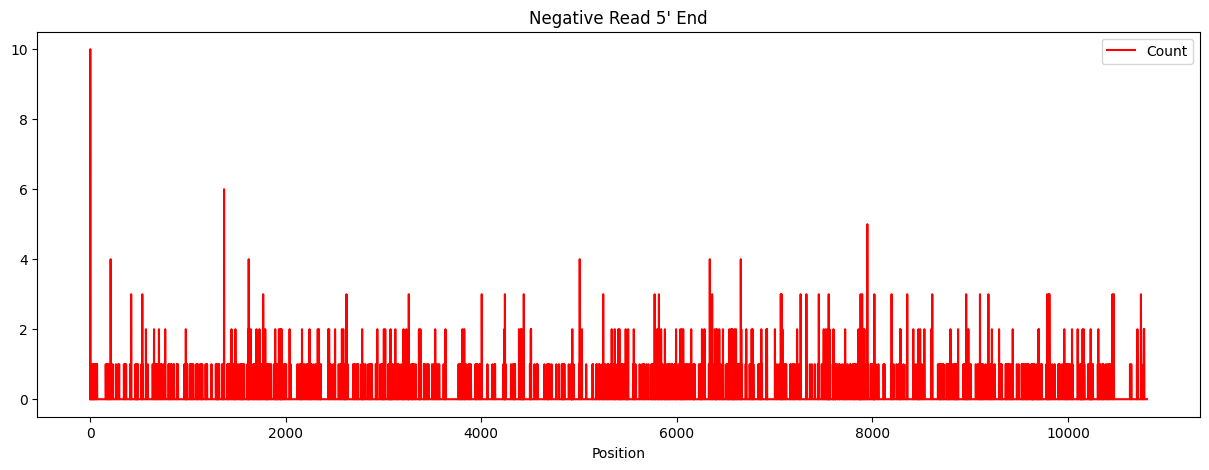

In [27]:
negative_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_start/ERR1802071.tsv", sep="\t", names=["Position", "Count"])
negative_start.plot('Position', 'Count', title='Negative Read 5\' End', figsize=(15, 5), colormap='autumn')

<Axes: title={'center': "Positive Read 3' End"}, xlabel='Position'>

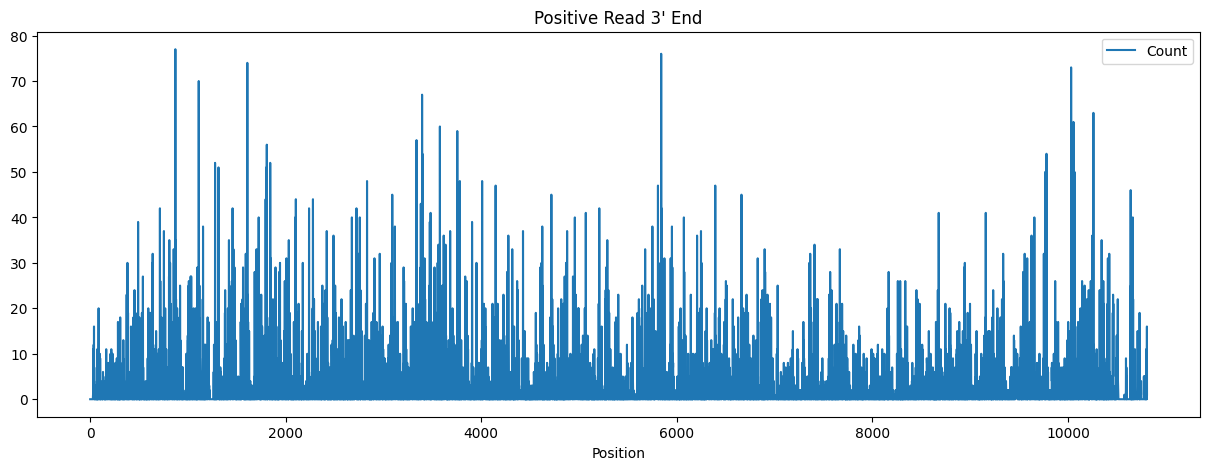

In [28]:
positive_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_end/ERR1802071.tsv", sep="\t", names=["Position", "Count"])
positive_end.plot('Position', 'Count', title='Positive Read 3\' End', figsize=(15, 5))

<Axes: title={'center': "Negative Read 3' End"}, xlabel='Position'>

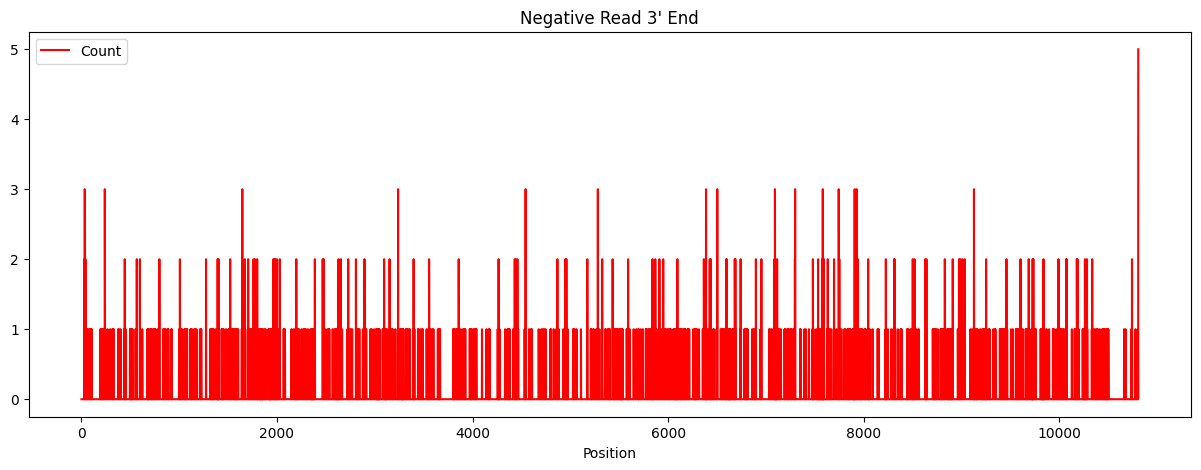

In [29]:
negative_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_end/ERR1802071.tsv", sep="\t", names=["Position", "Count"])
negative_end.plot('Position', 'Count', title='Negative Read 3\' End', figsize=(15, 5), colormap='autumn')

# Final Plots

In [30]:
%cd /mnt/Subgenomic_plotting/plotting

/mnt/Subgenomic_plotting/plotting


<Axes: title={'center': 'Reference Virus Coverage'}, xlabel='Position'>

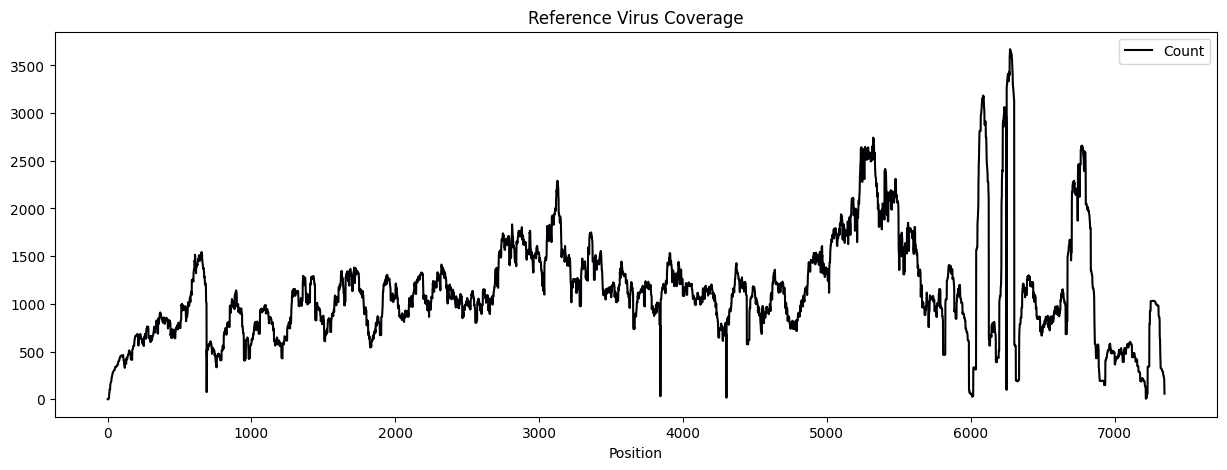

In [32]:
original_depth = pd.read_csv("original_depth/SRR10071297.tsv", sep="\t", names=["Virus", "Position", "Count"])
original_depth.plot('Position', 'Count', title='Reference Virus Coverage', figsize=(15, 5), colormap='magma')

In [33]:
positive_depth = pd.read_csv("positive_depth/SRR10071297.tsv", sep="\t", names=["Virus", "Position", "Count"])
negative_depth = pd.read_csv("negative_depth/SRR10071297.tsv", sep="\t", names=["Virus", "Position", "Count"])

<Axes: title={'center': 'Sense Reads'}, xlabel='Position'>

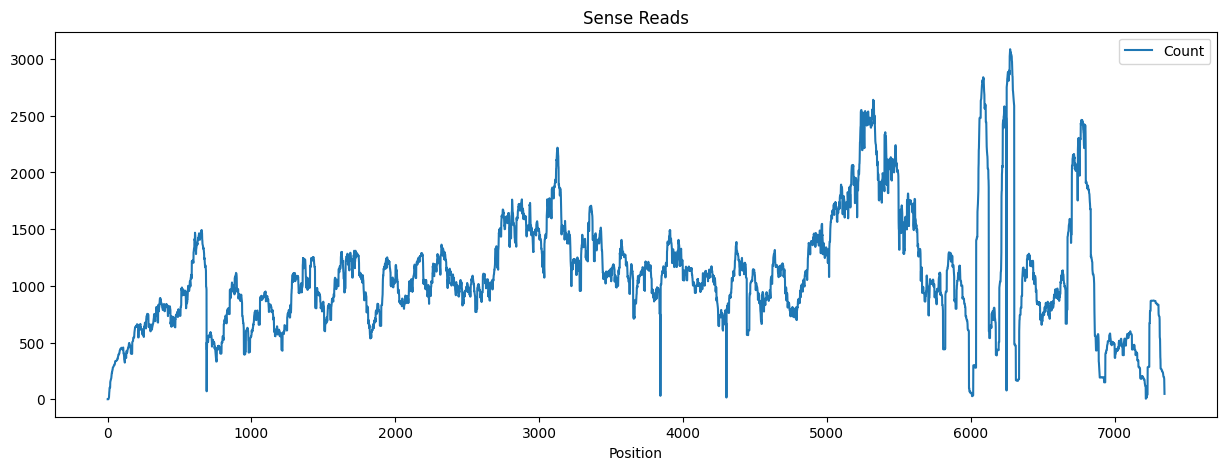

In [34]:
positive_depth.plot('Position', 'Count', title='Sense Reads', figsize=(15, 5))

<Axes: title={'center': 'Antisense Reads'}, xlabel='Position'>

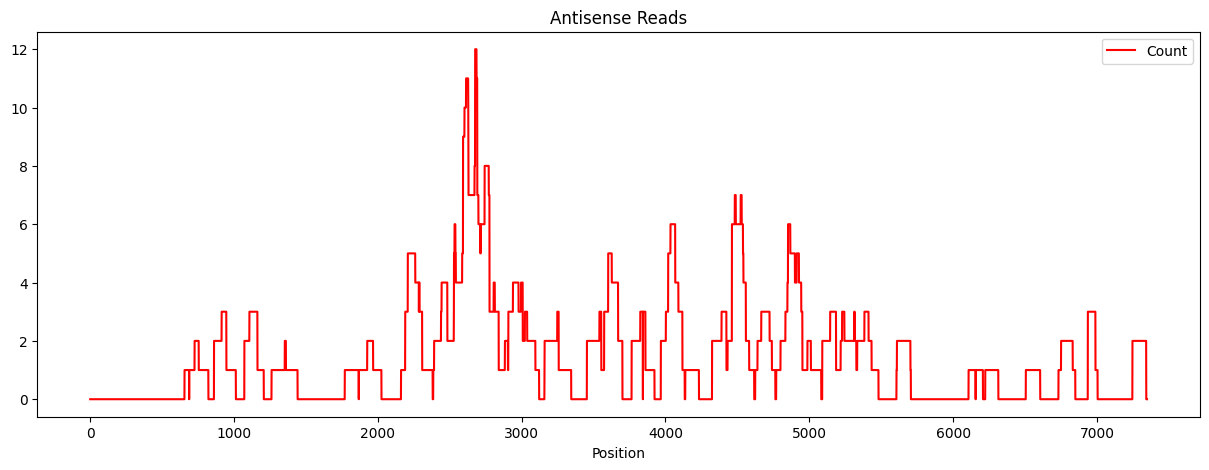

In [35]:
negative_depth.plot('Position', 'Count', title='Antisense Reads', figsize=(15, 5), colormap='autumn')

<Axes: title={'center': "Positive Read 5' End"}, xlabel='Position'>

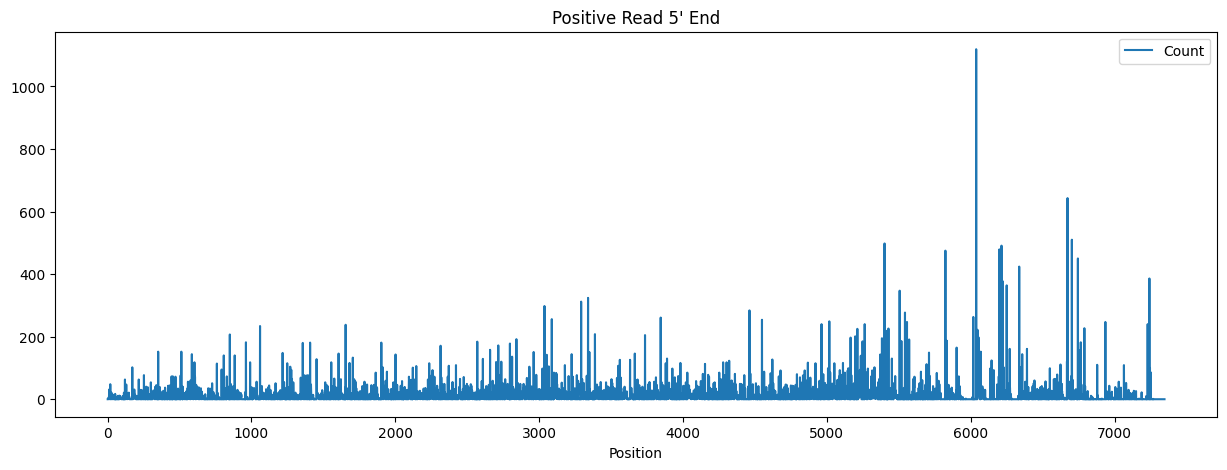

In [36]:
positive_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_start/SRR10071297.tsv", sep="\t", names=["Position", "Count"])
positive_start.plot('Position', 'Count', title='Positive Read 5\' End', figsize=(15, 5))

<Axes: title={'center': "Negative Read 5' End"}, xlabel='Position'>

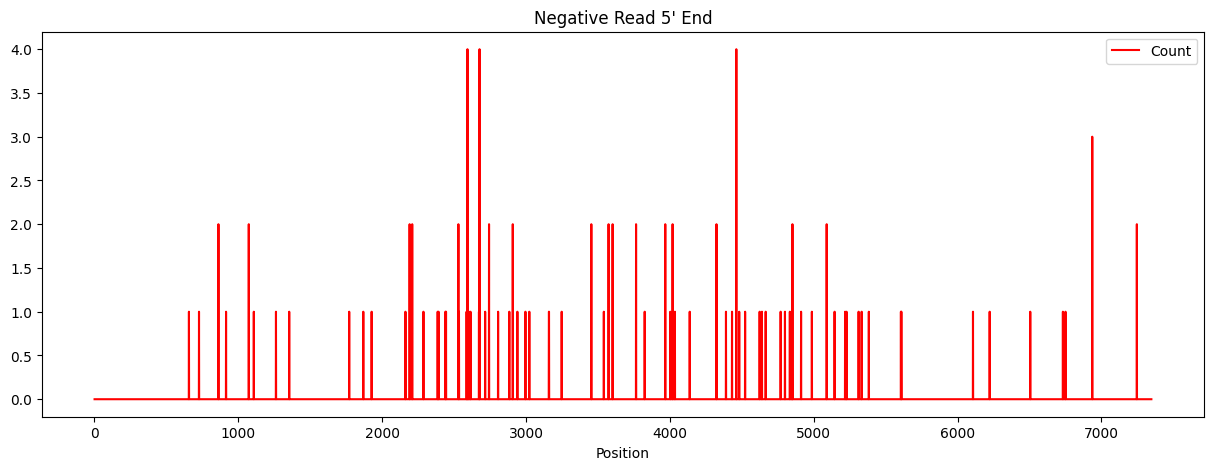

In [37]:
negative_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_start/SRR10071297.tsv", sep="\t", names=["Position", "Count"])
negative_start.plot('Position', 'Count', title='Negative Read 5\' End', figsize=(15, 5), colormap='autumn')

<Axes: title={'center': "Positive Read 3' End"}, xlabel='Position'>

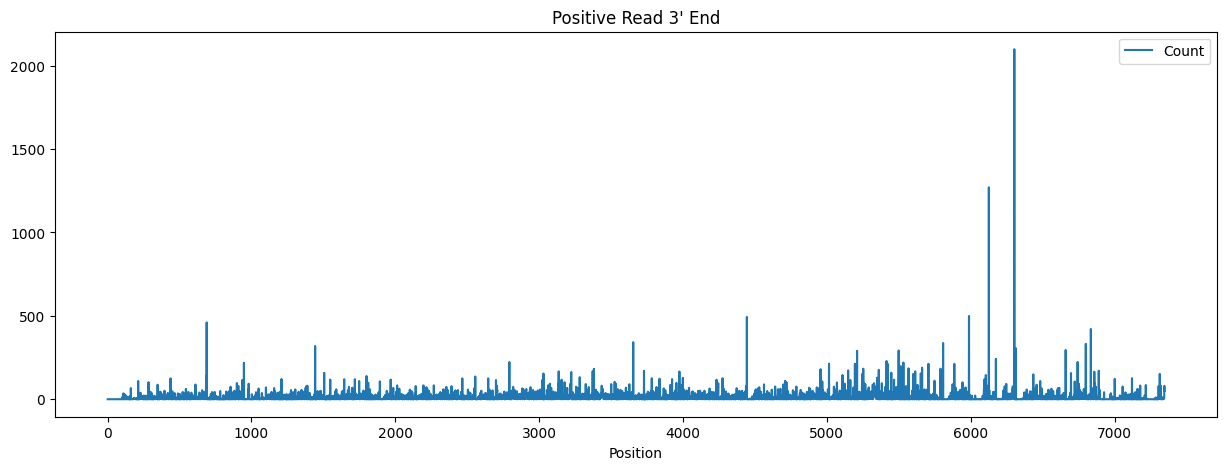

In [38]:
positive_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_end/SRR10071297.tsv", sep="\t", names=["Position", "Count"])
positive_end.plot('Position', 'Count', title='Positive Read 3\' End', figsize=(15, 5))

<Axes: title={'center': "Negative Read 3' End"}, xlabel='Position'>

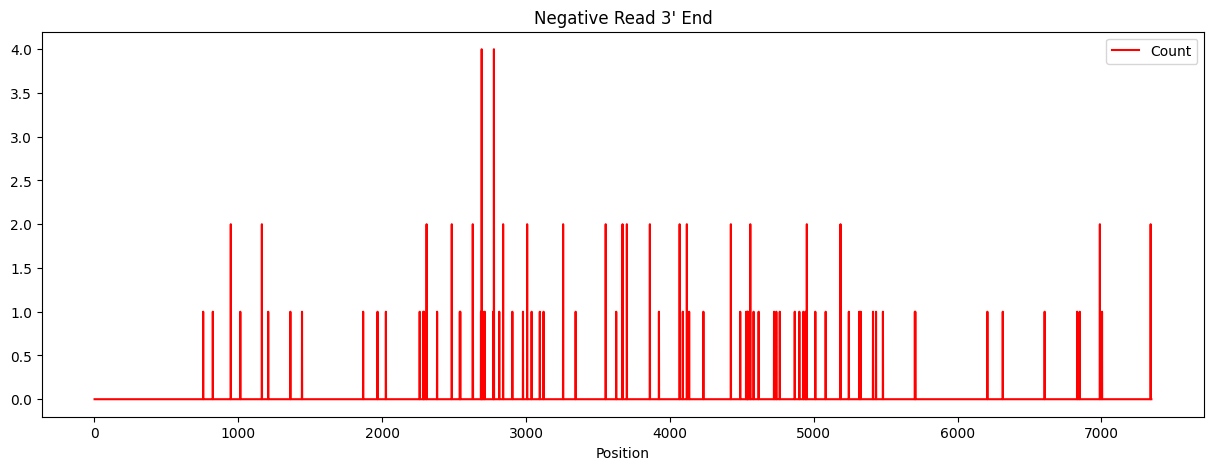

In [39]:
negative_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_end/SRR10071297.tsv", sep="\t", names=["Position", "Count"])
negative_end.plot('Position', 'Count', title='Negative Read 3\' End', figsize=(15, 5), colormap='autumn')

In [40]:
%cd /mnt/Subgenomic_plotting/plotting

/mnt/Subgenomic_plotting/plotting


In [5]:
original_depth = "Zika_virus_SRR15923994_sorted"
acc = "SRR15923994"

original_depth = pd.read_csv("original_depth/" + original_depth + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
positive_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
negative_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
positive_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
negative_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])

In [6]:
acc_list

['ERR1802071',
 'ERR1802074',
 'SRR8155999',
 'SRR16202396',
 'SRR15923994',
 'SRR6822148',
 'SRR10071297',
 'SRR10071298',
 'SRR5206482']

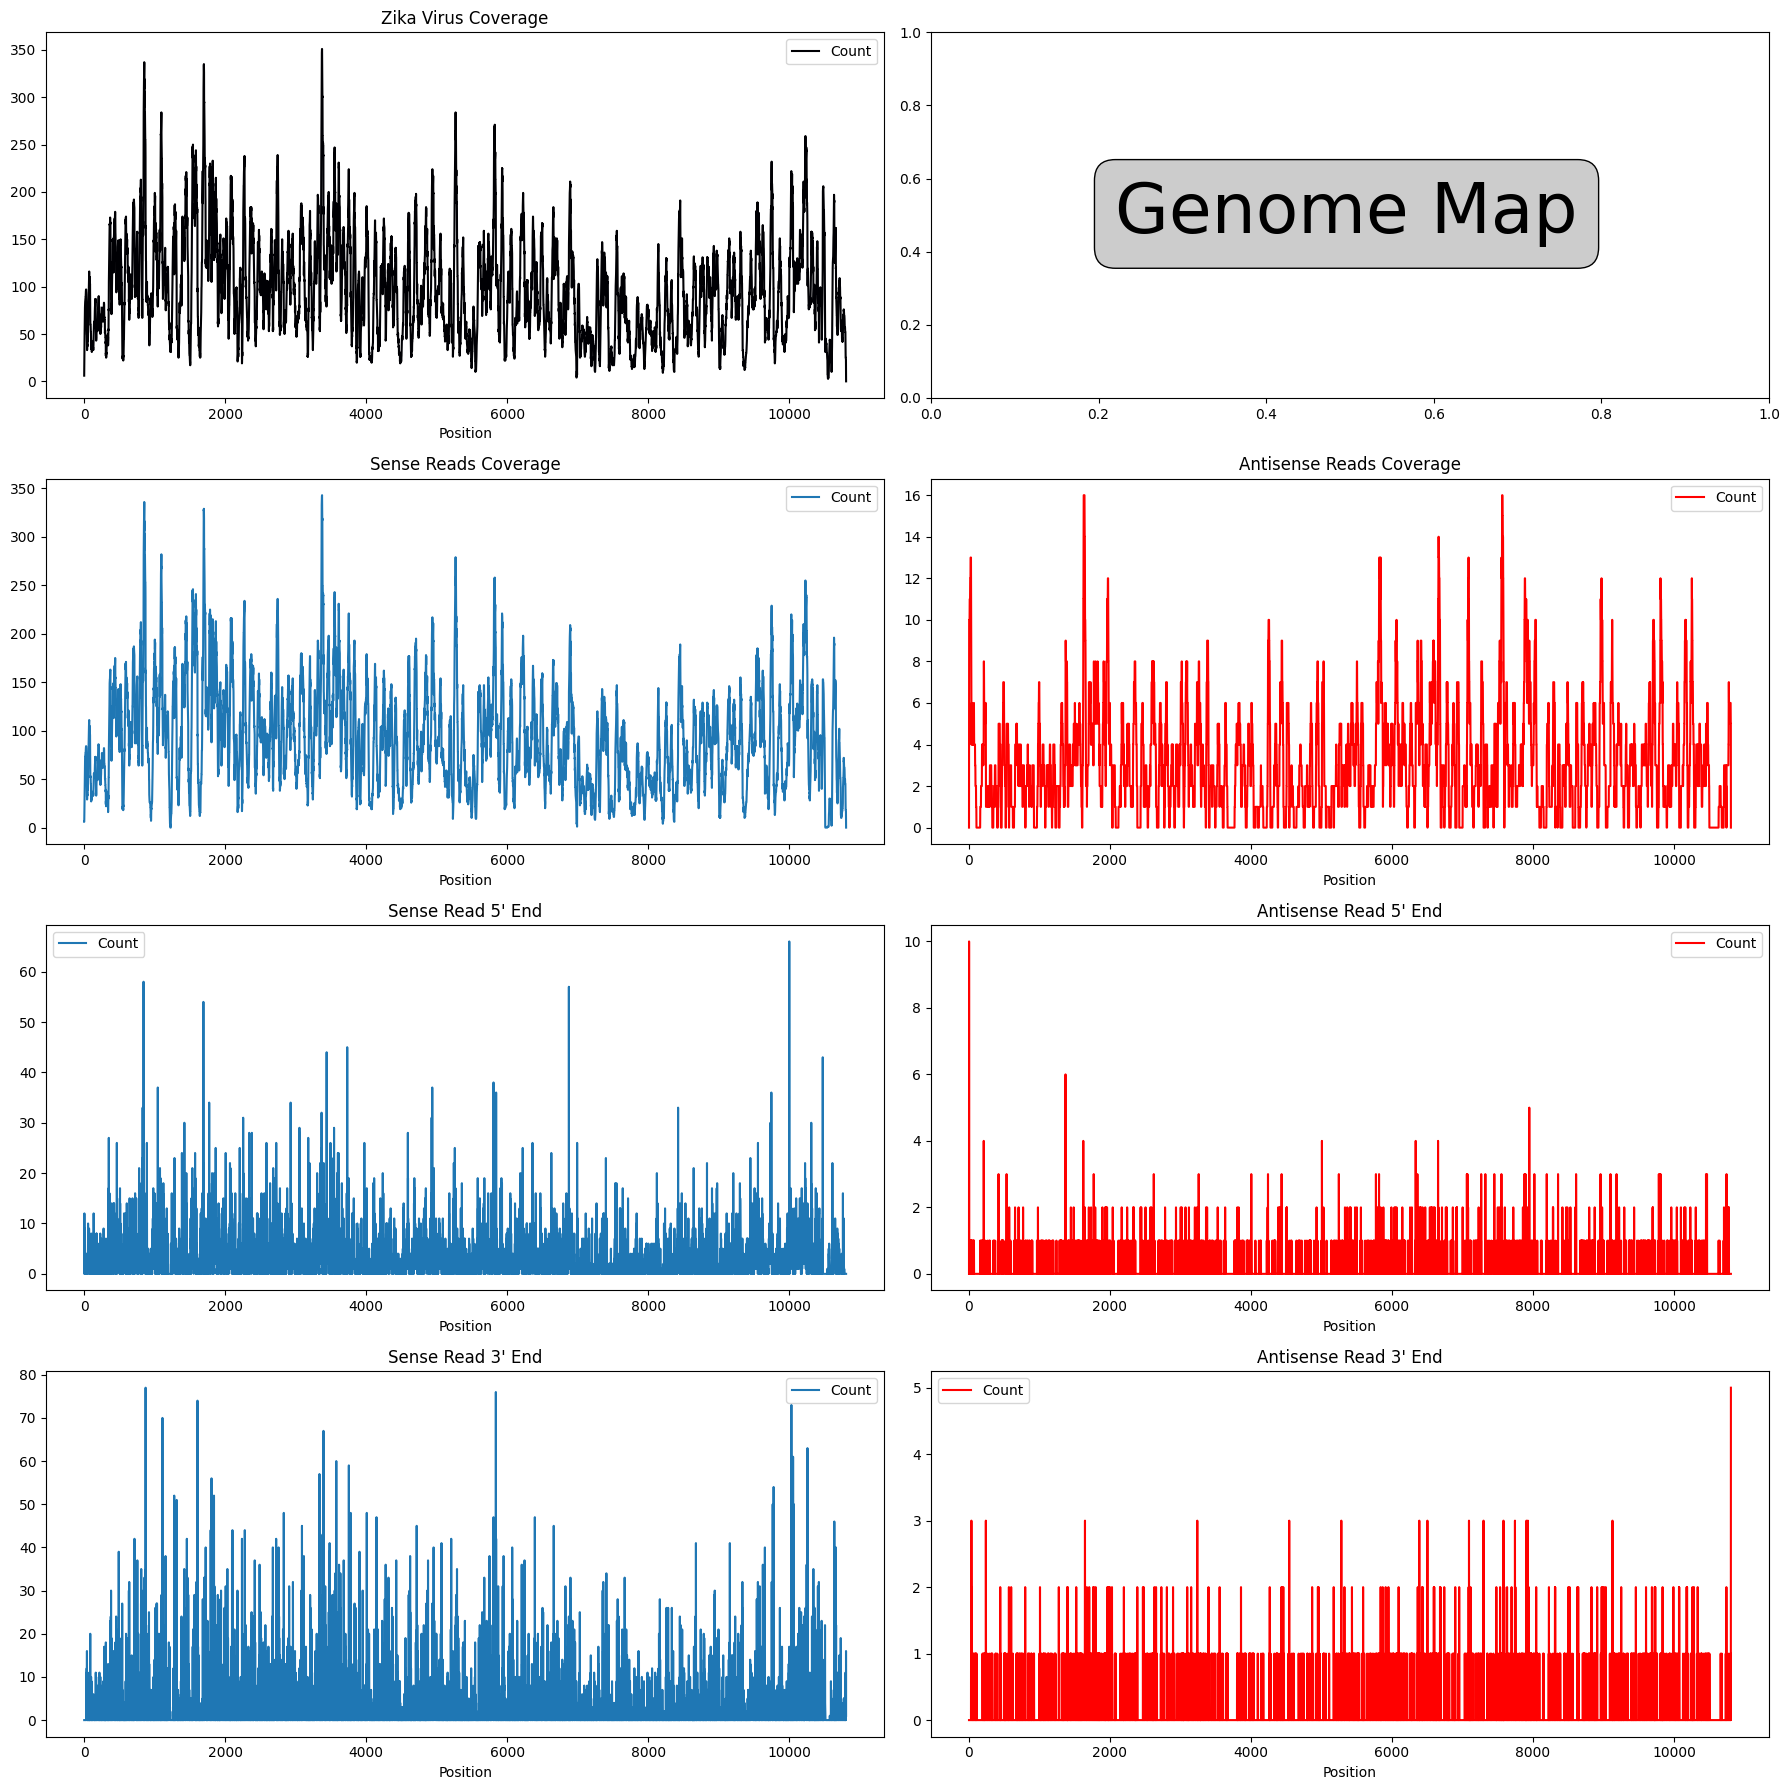

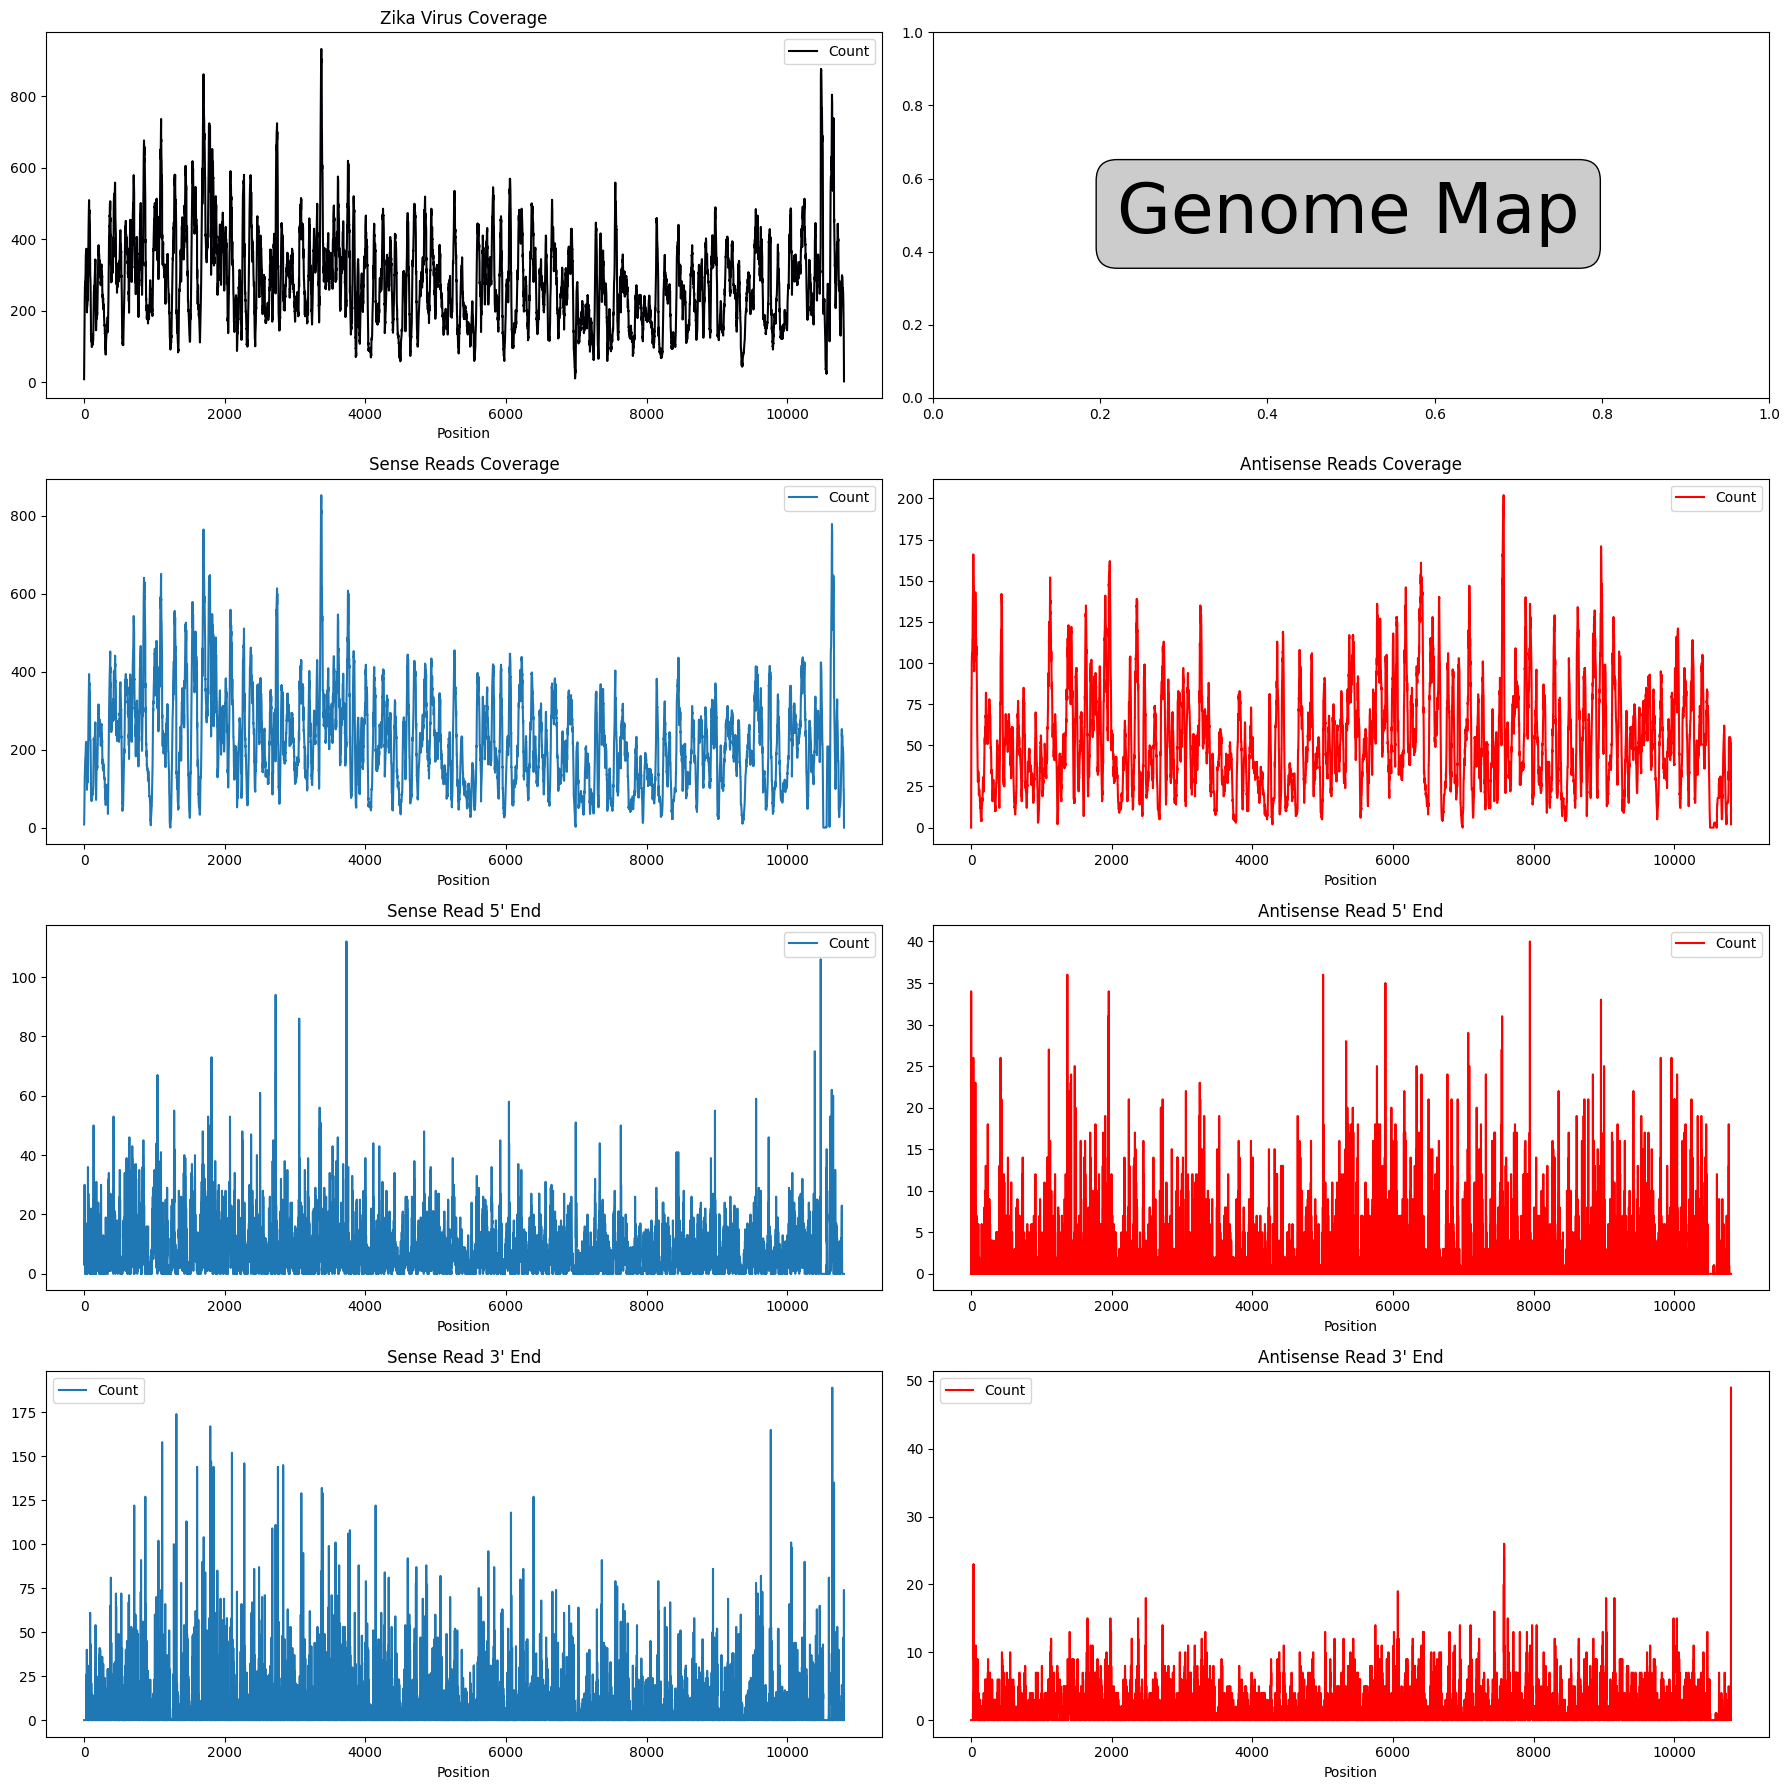

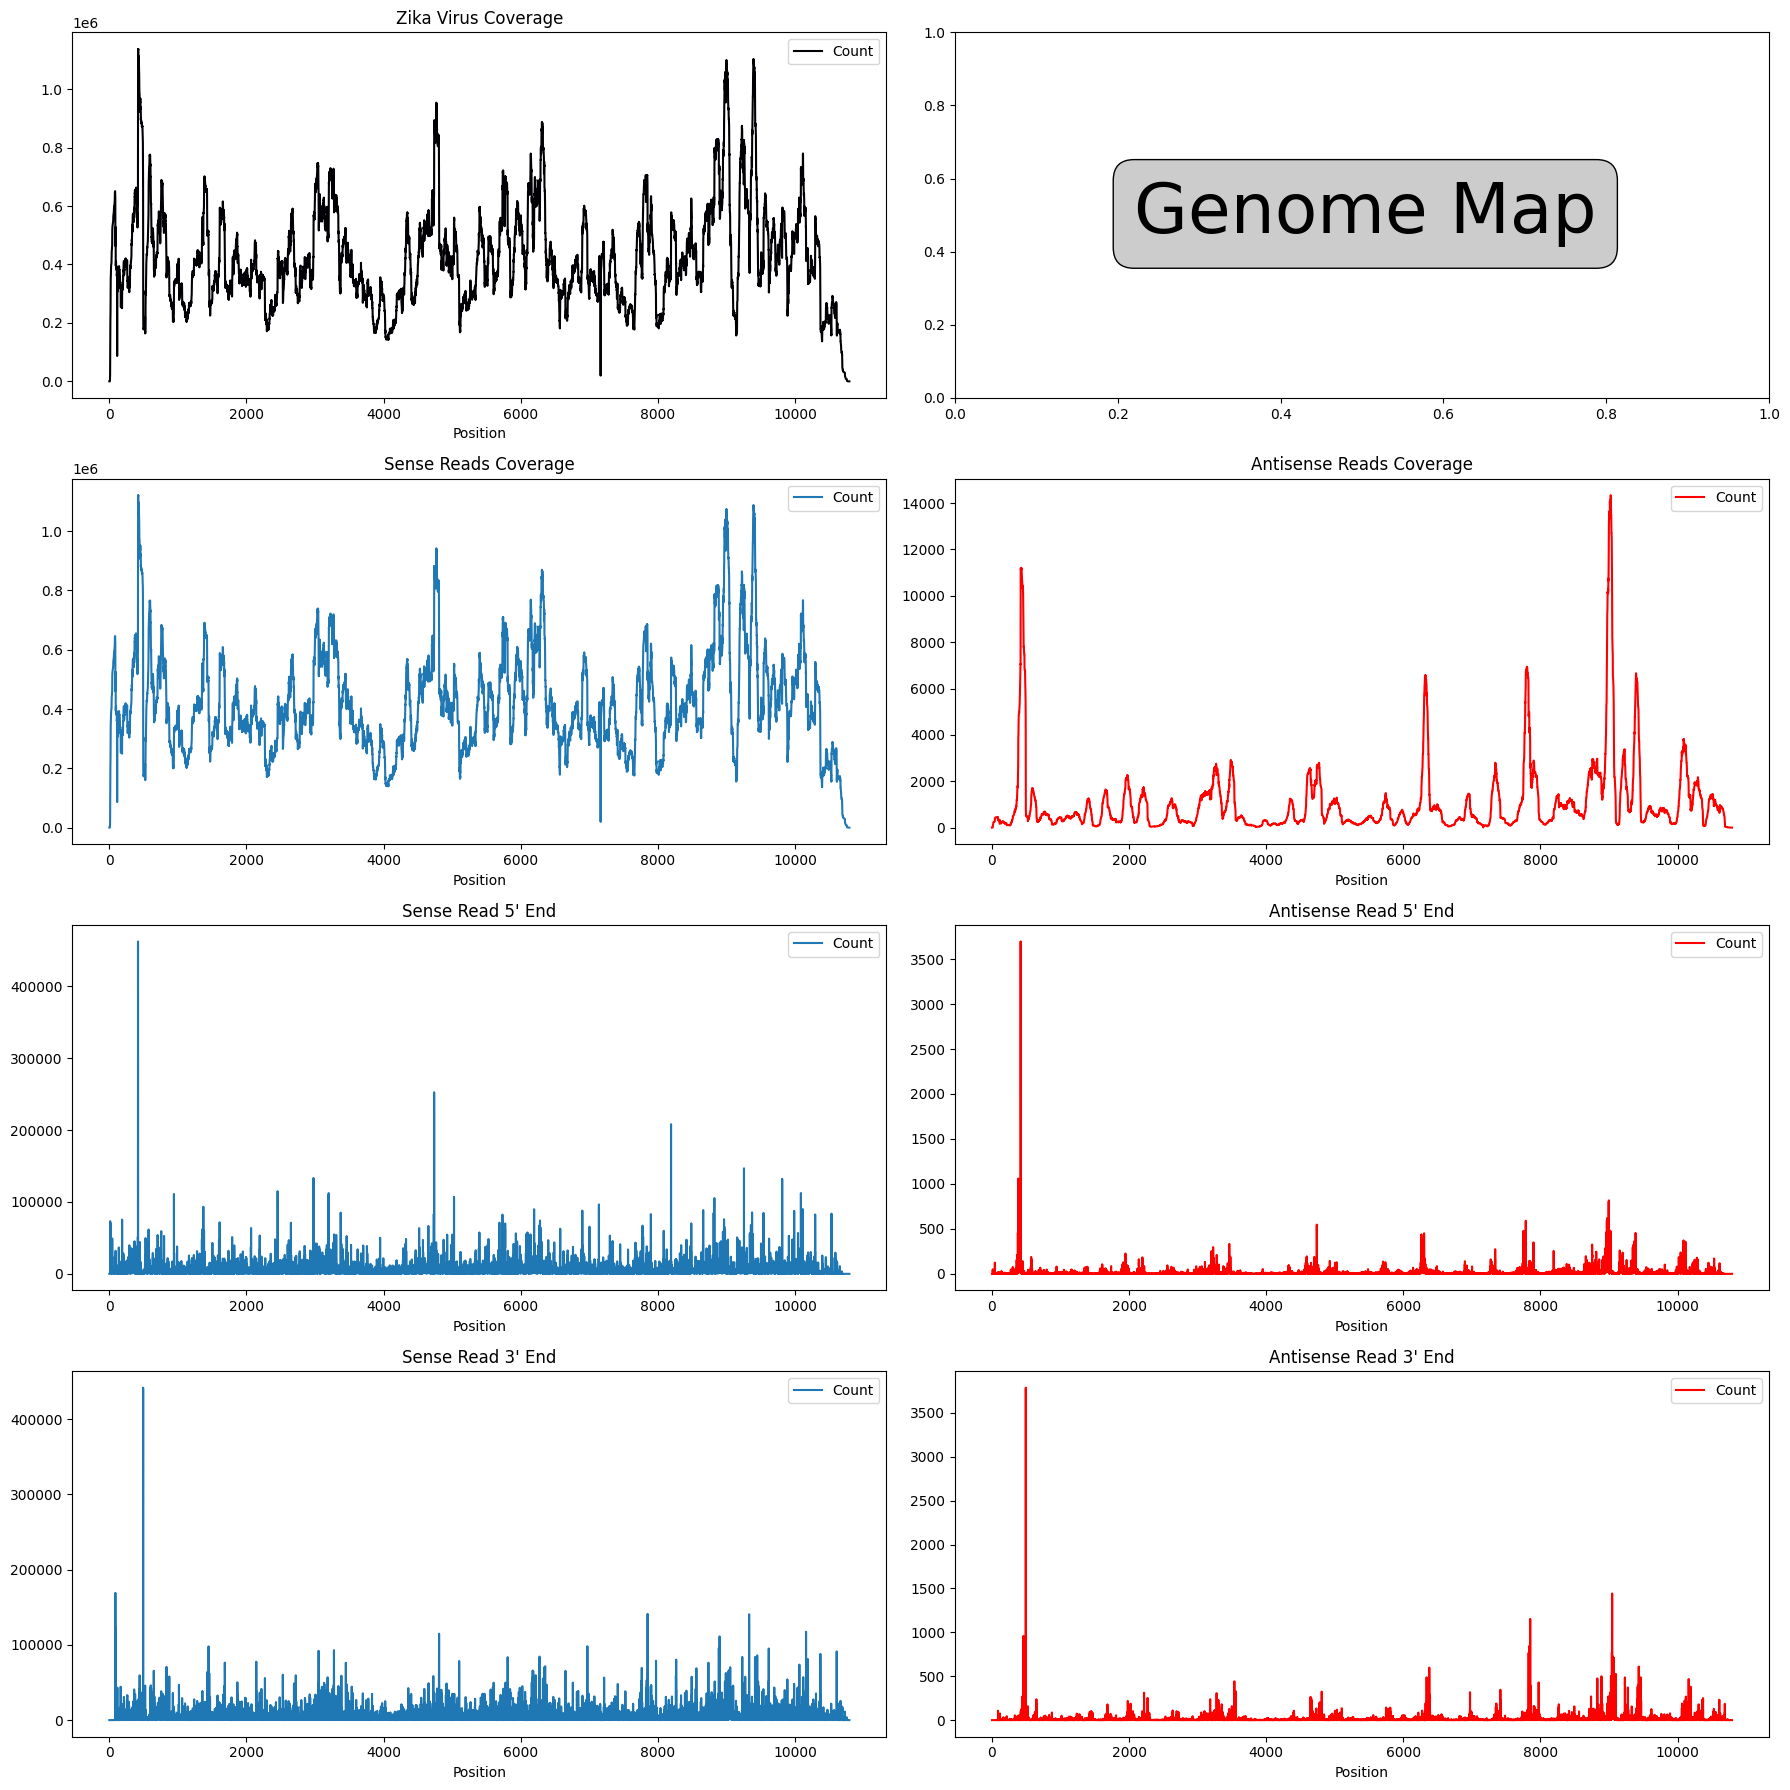

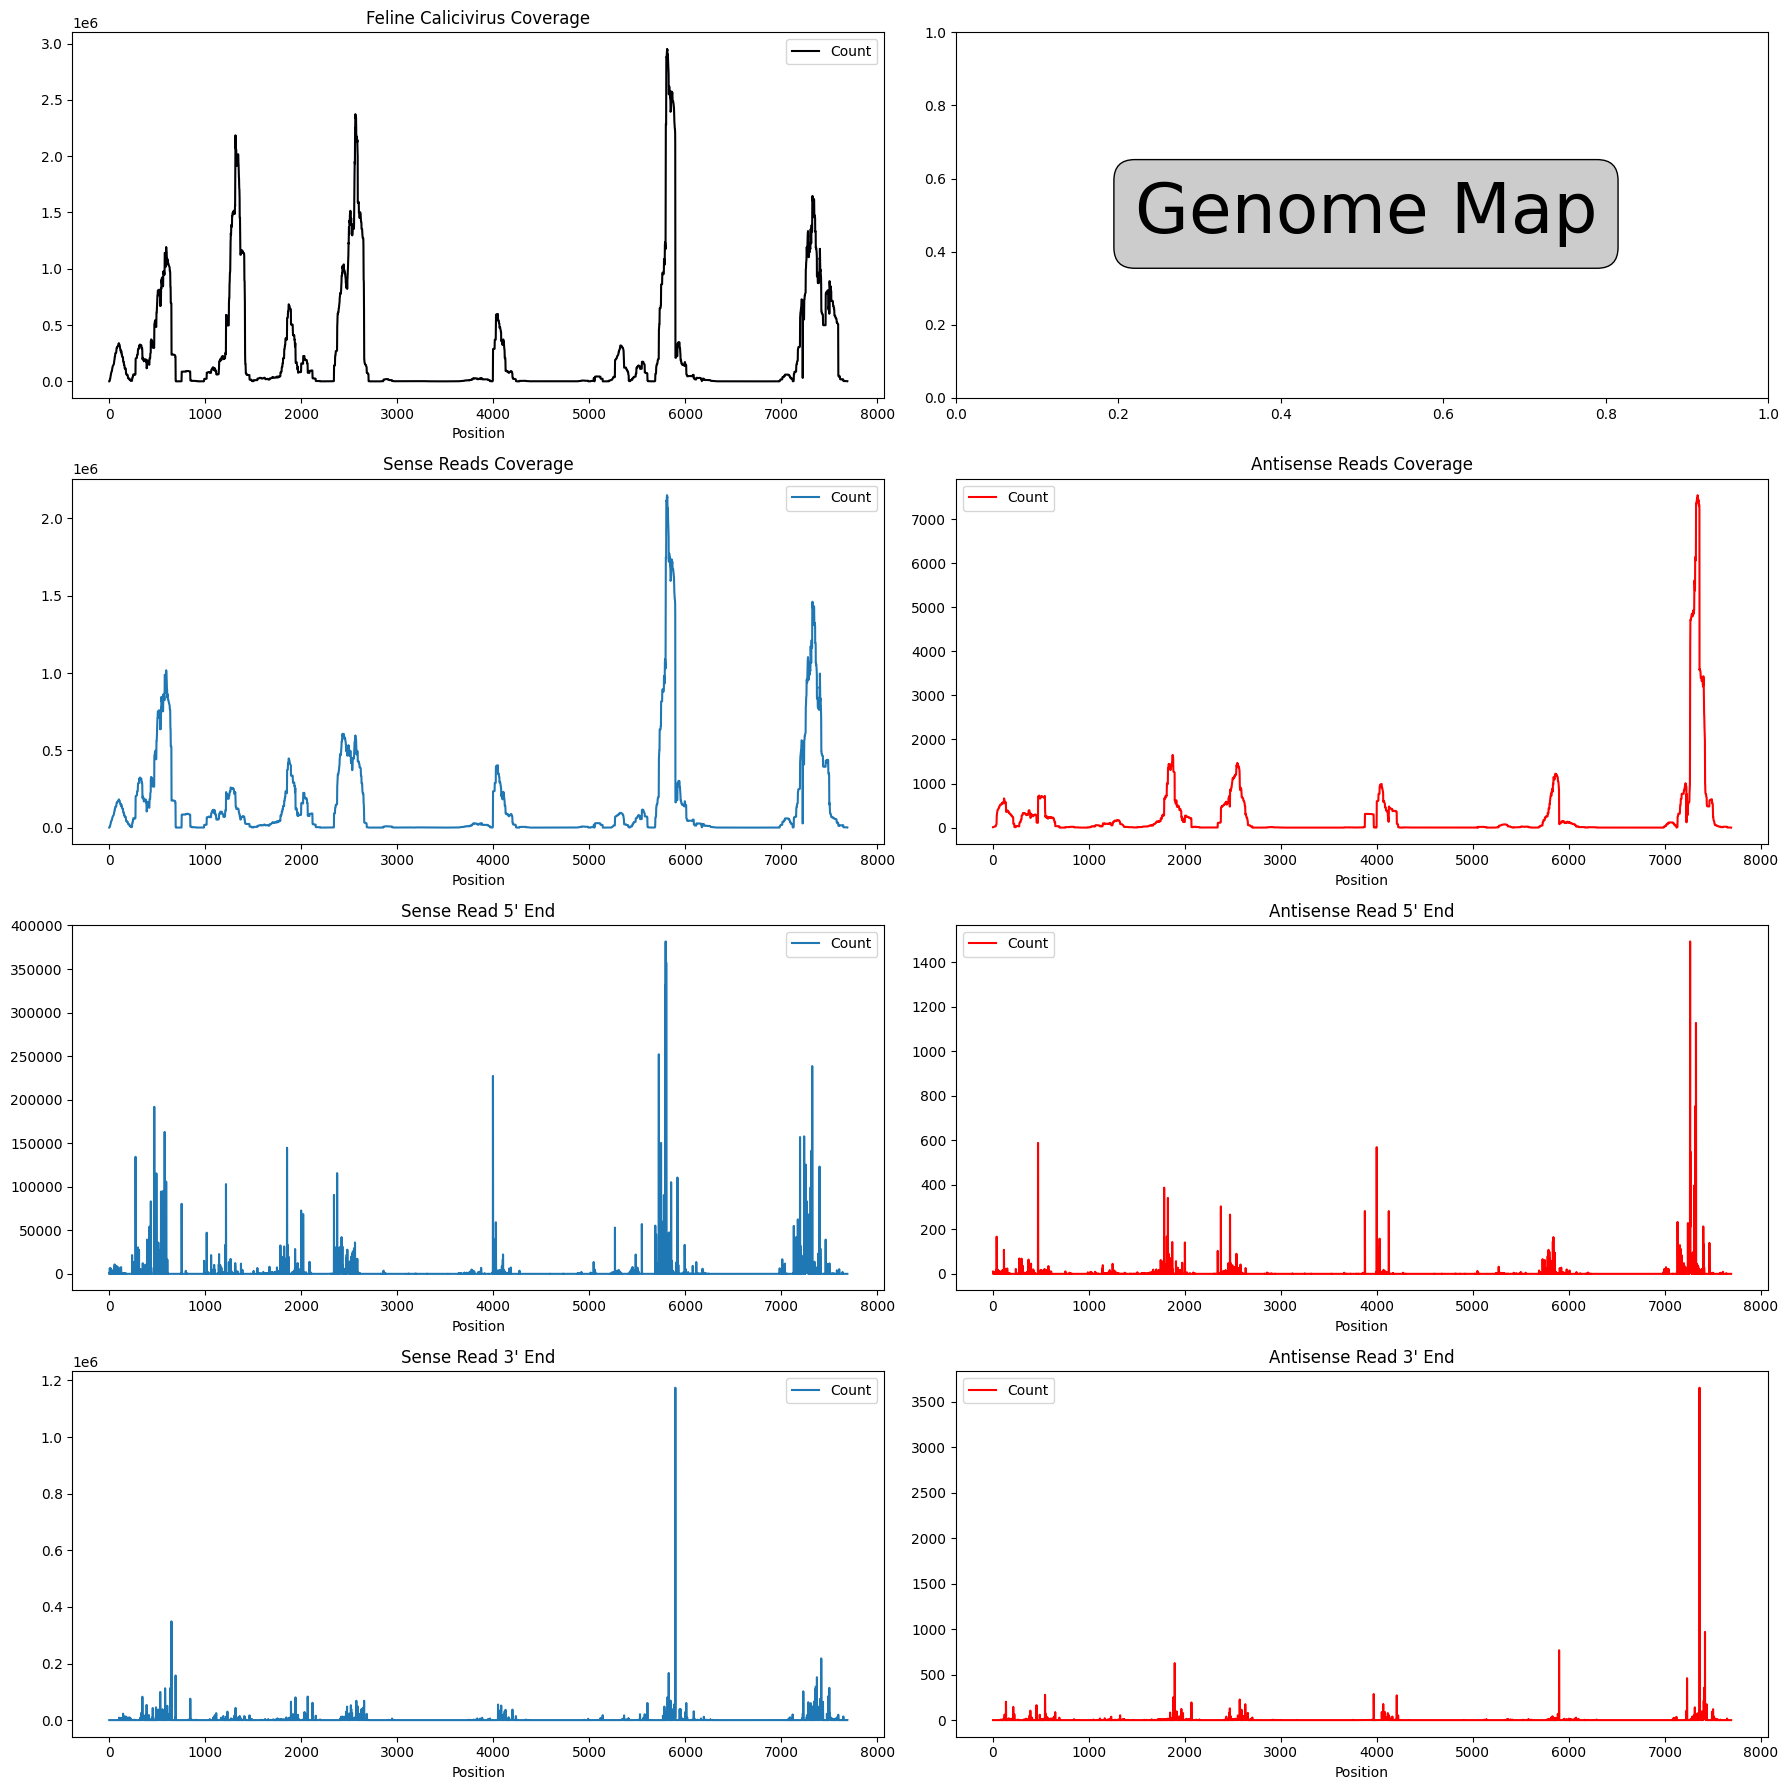

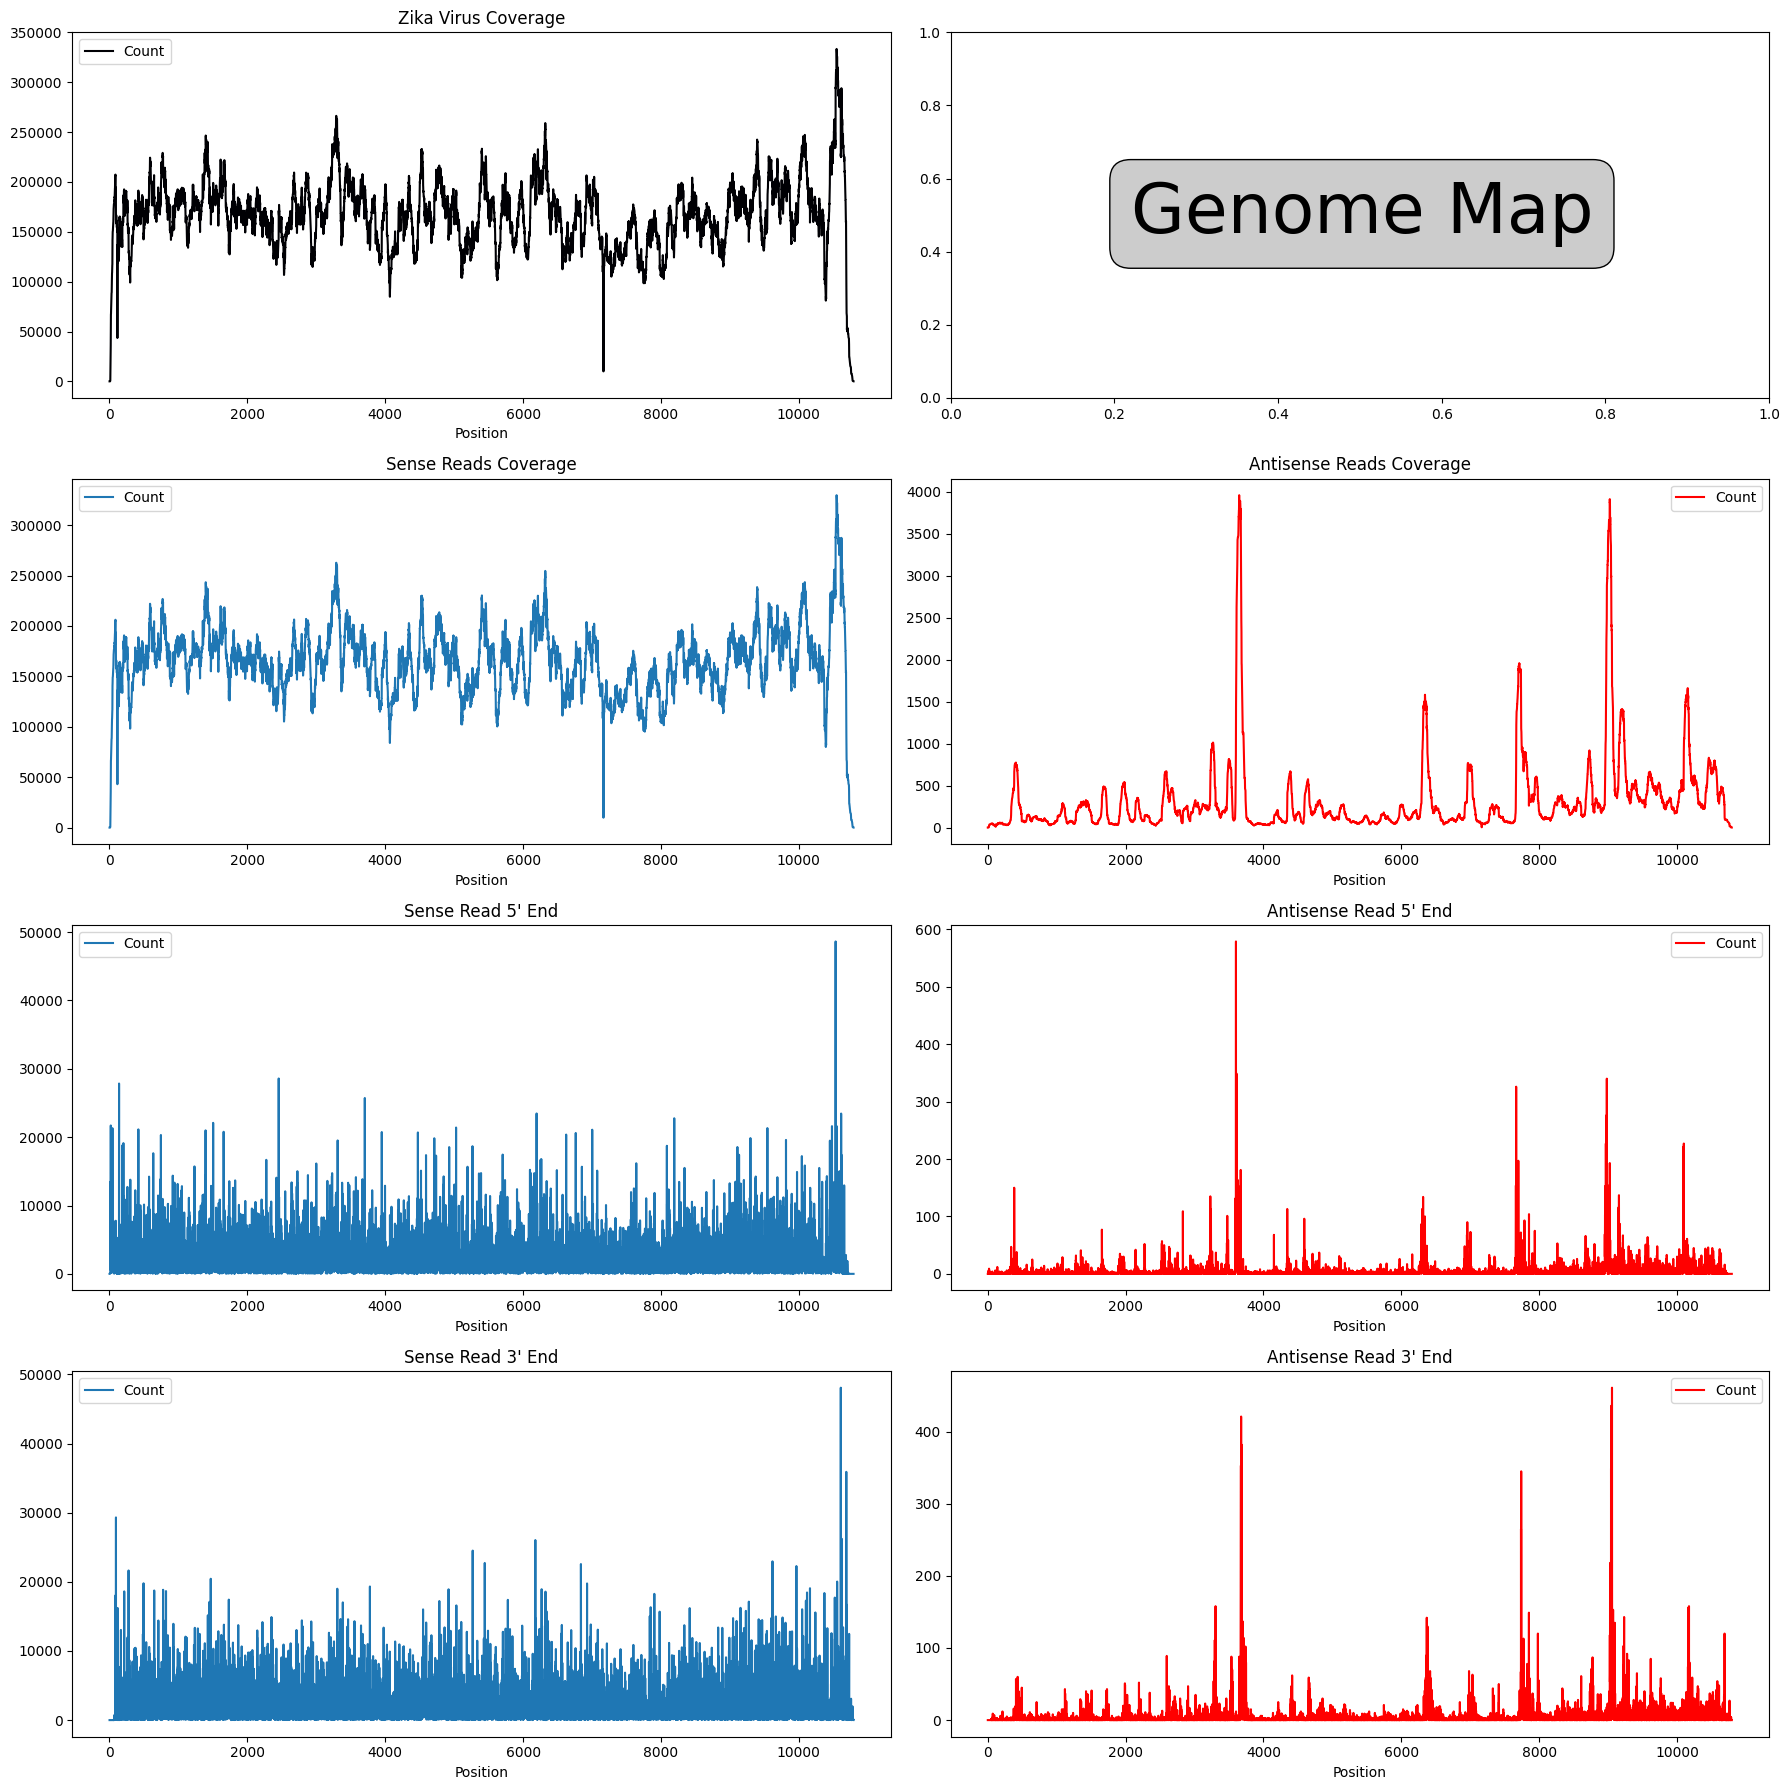

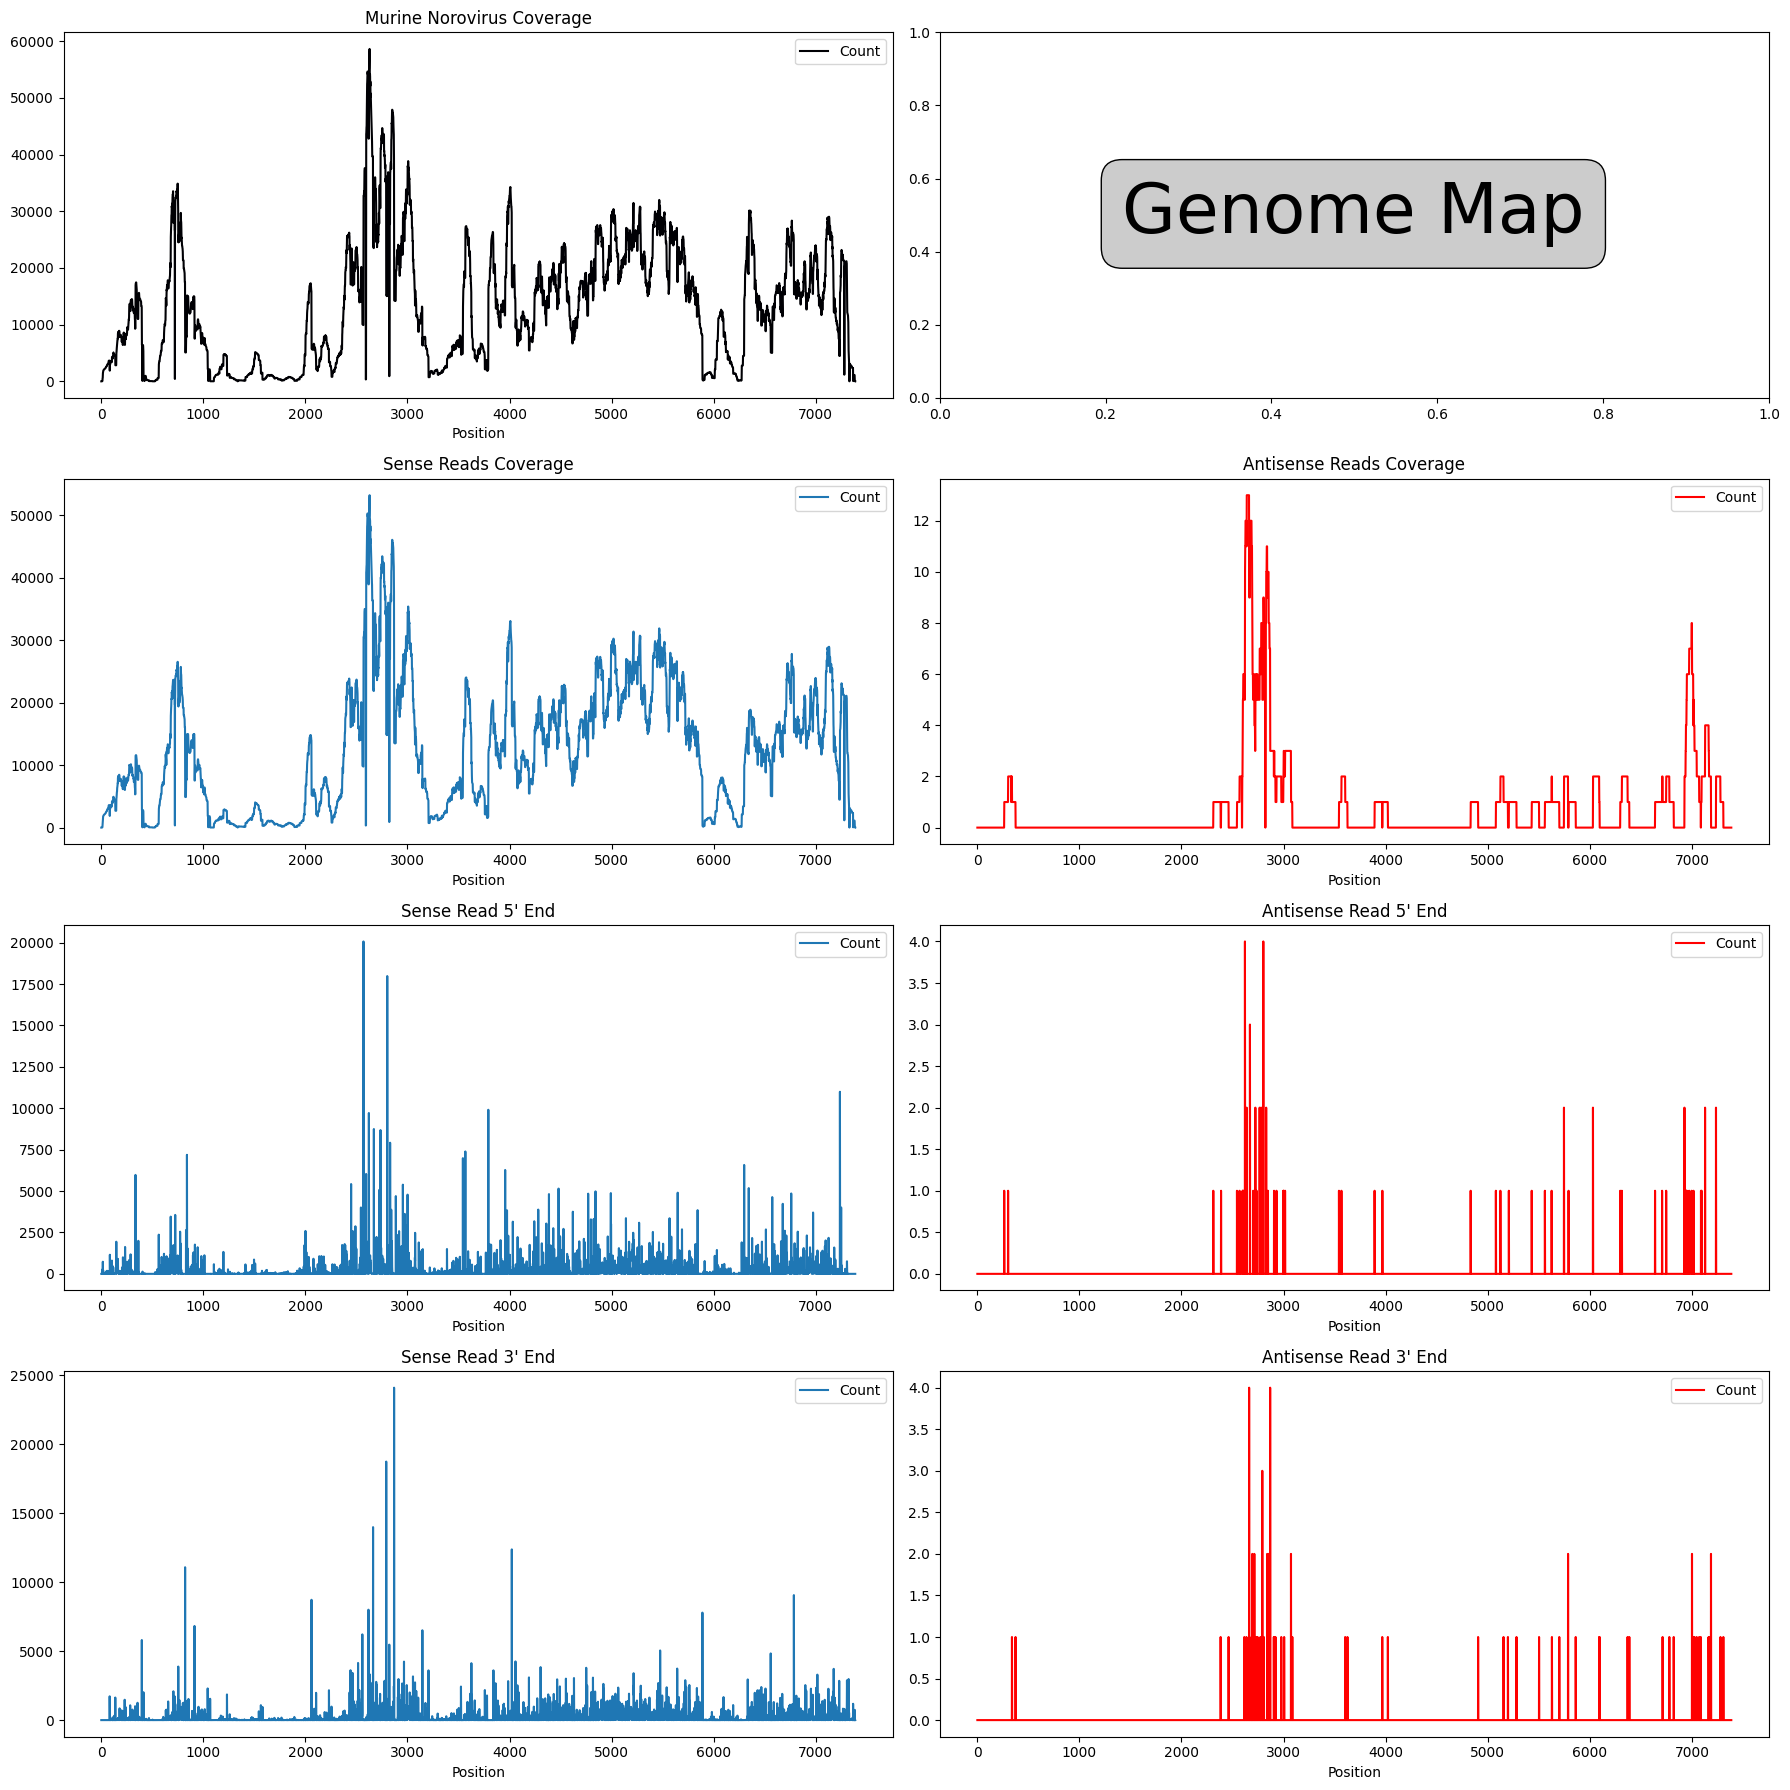

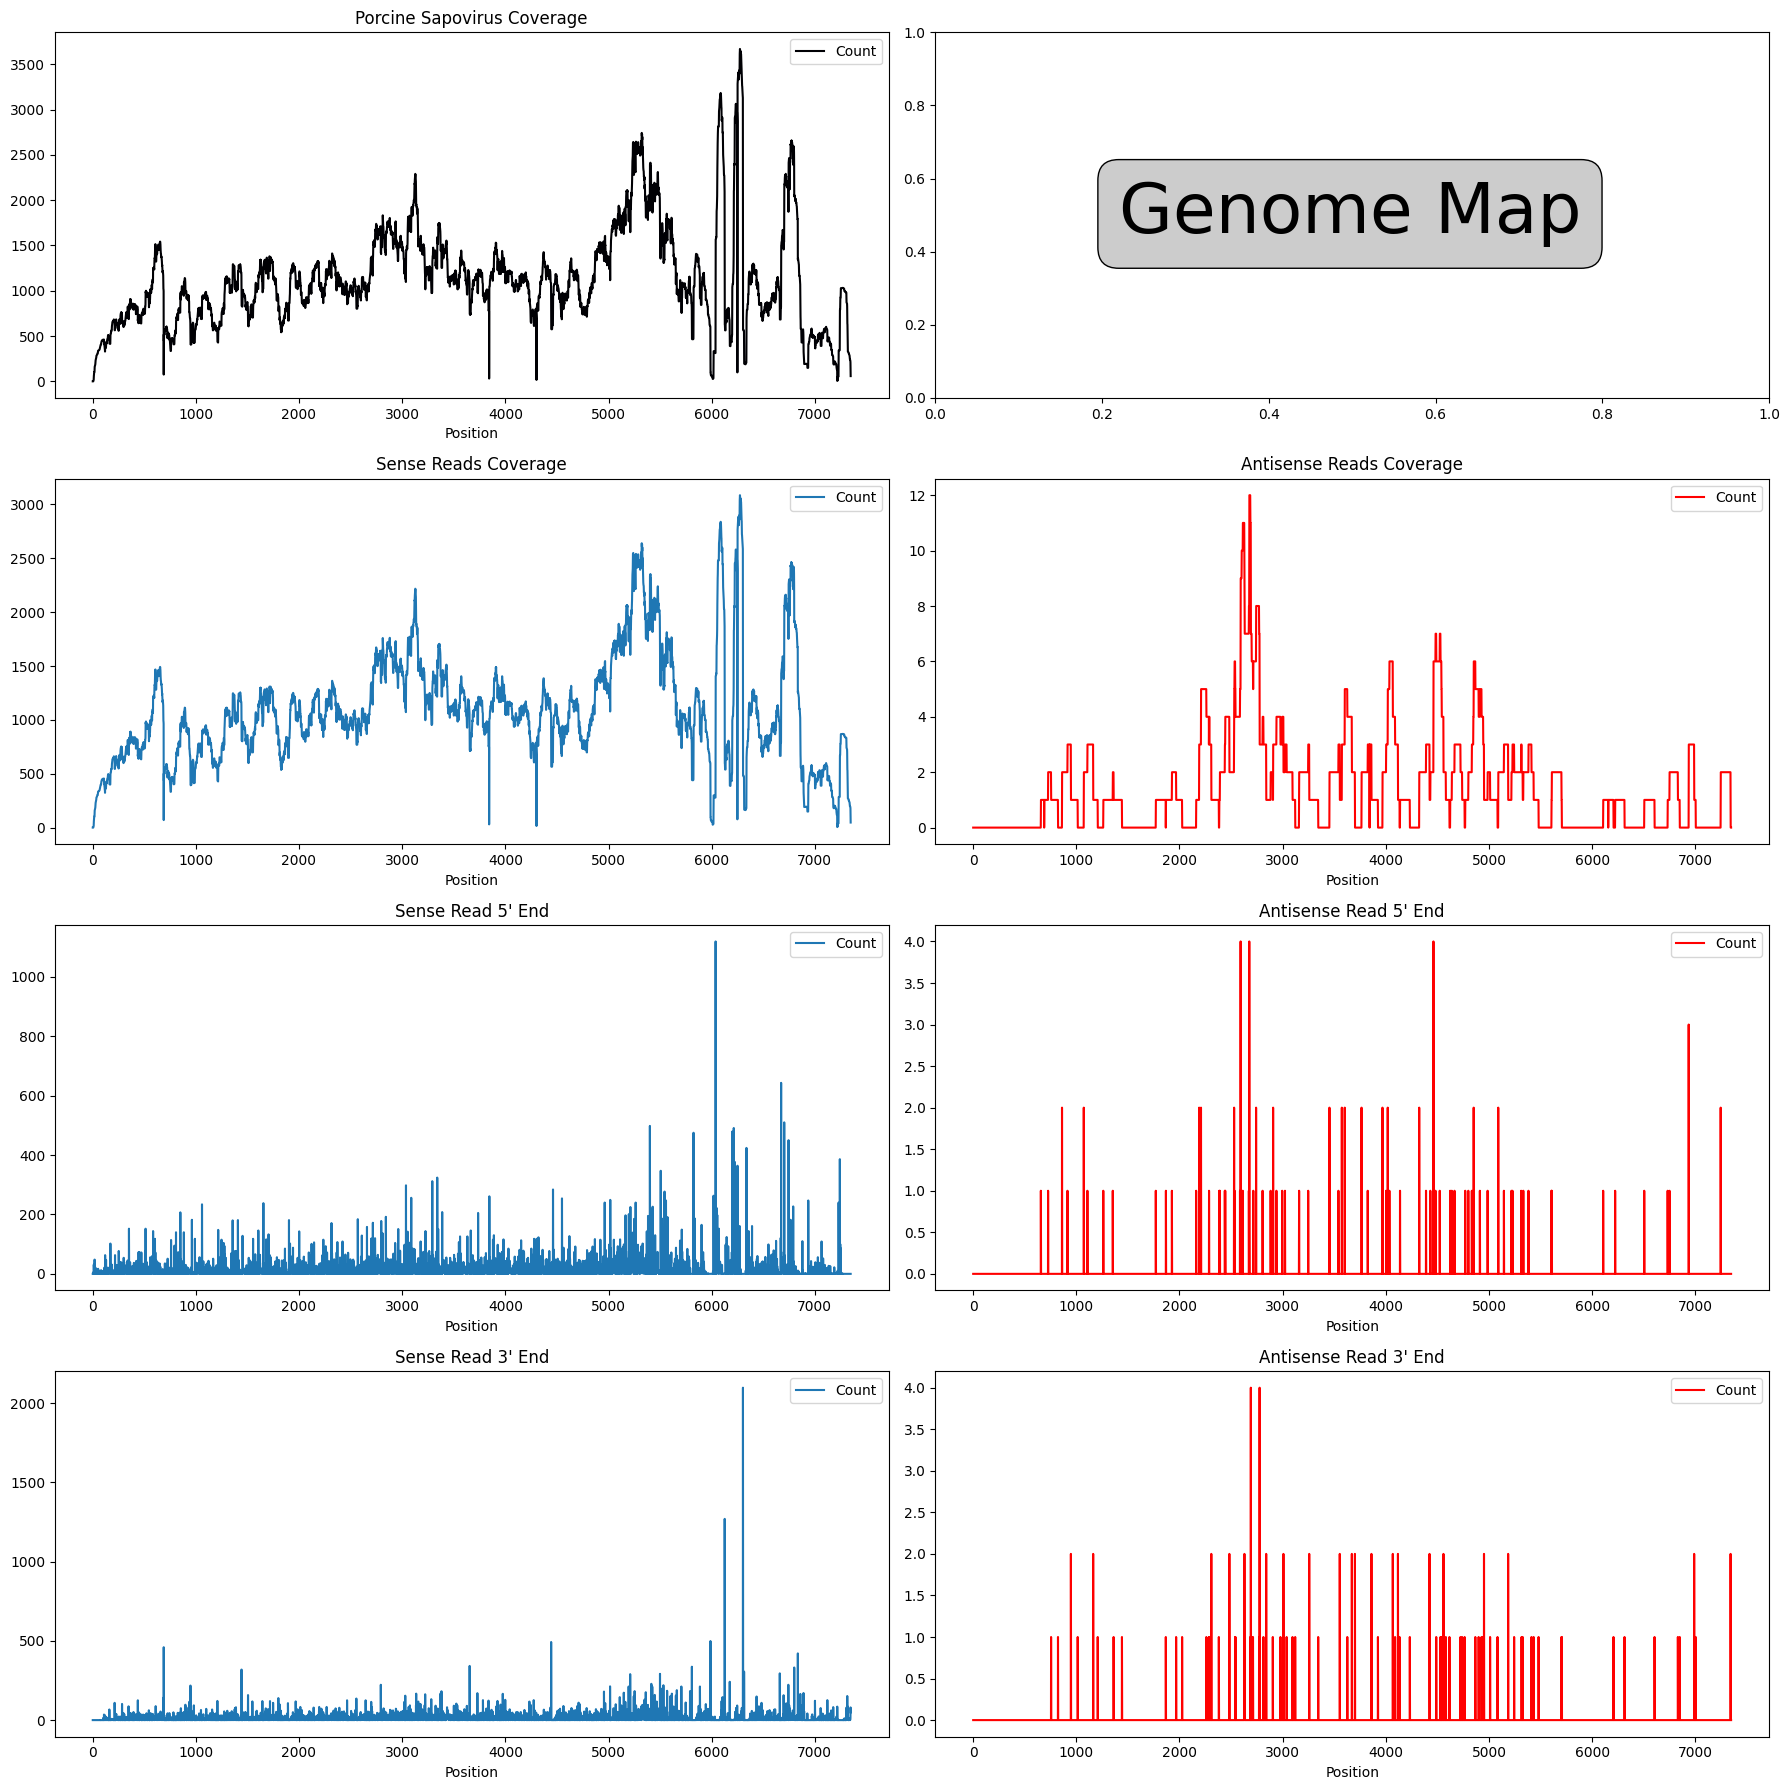

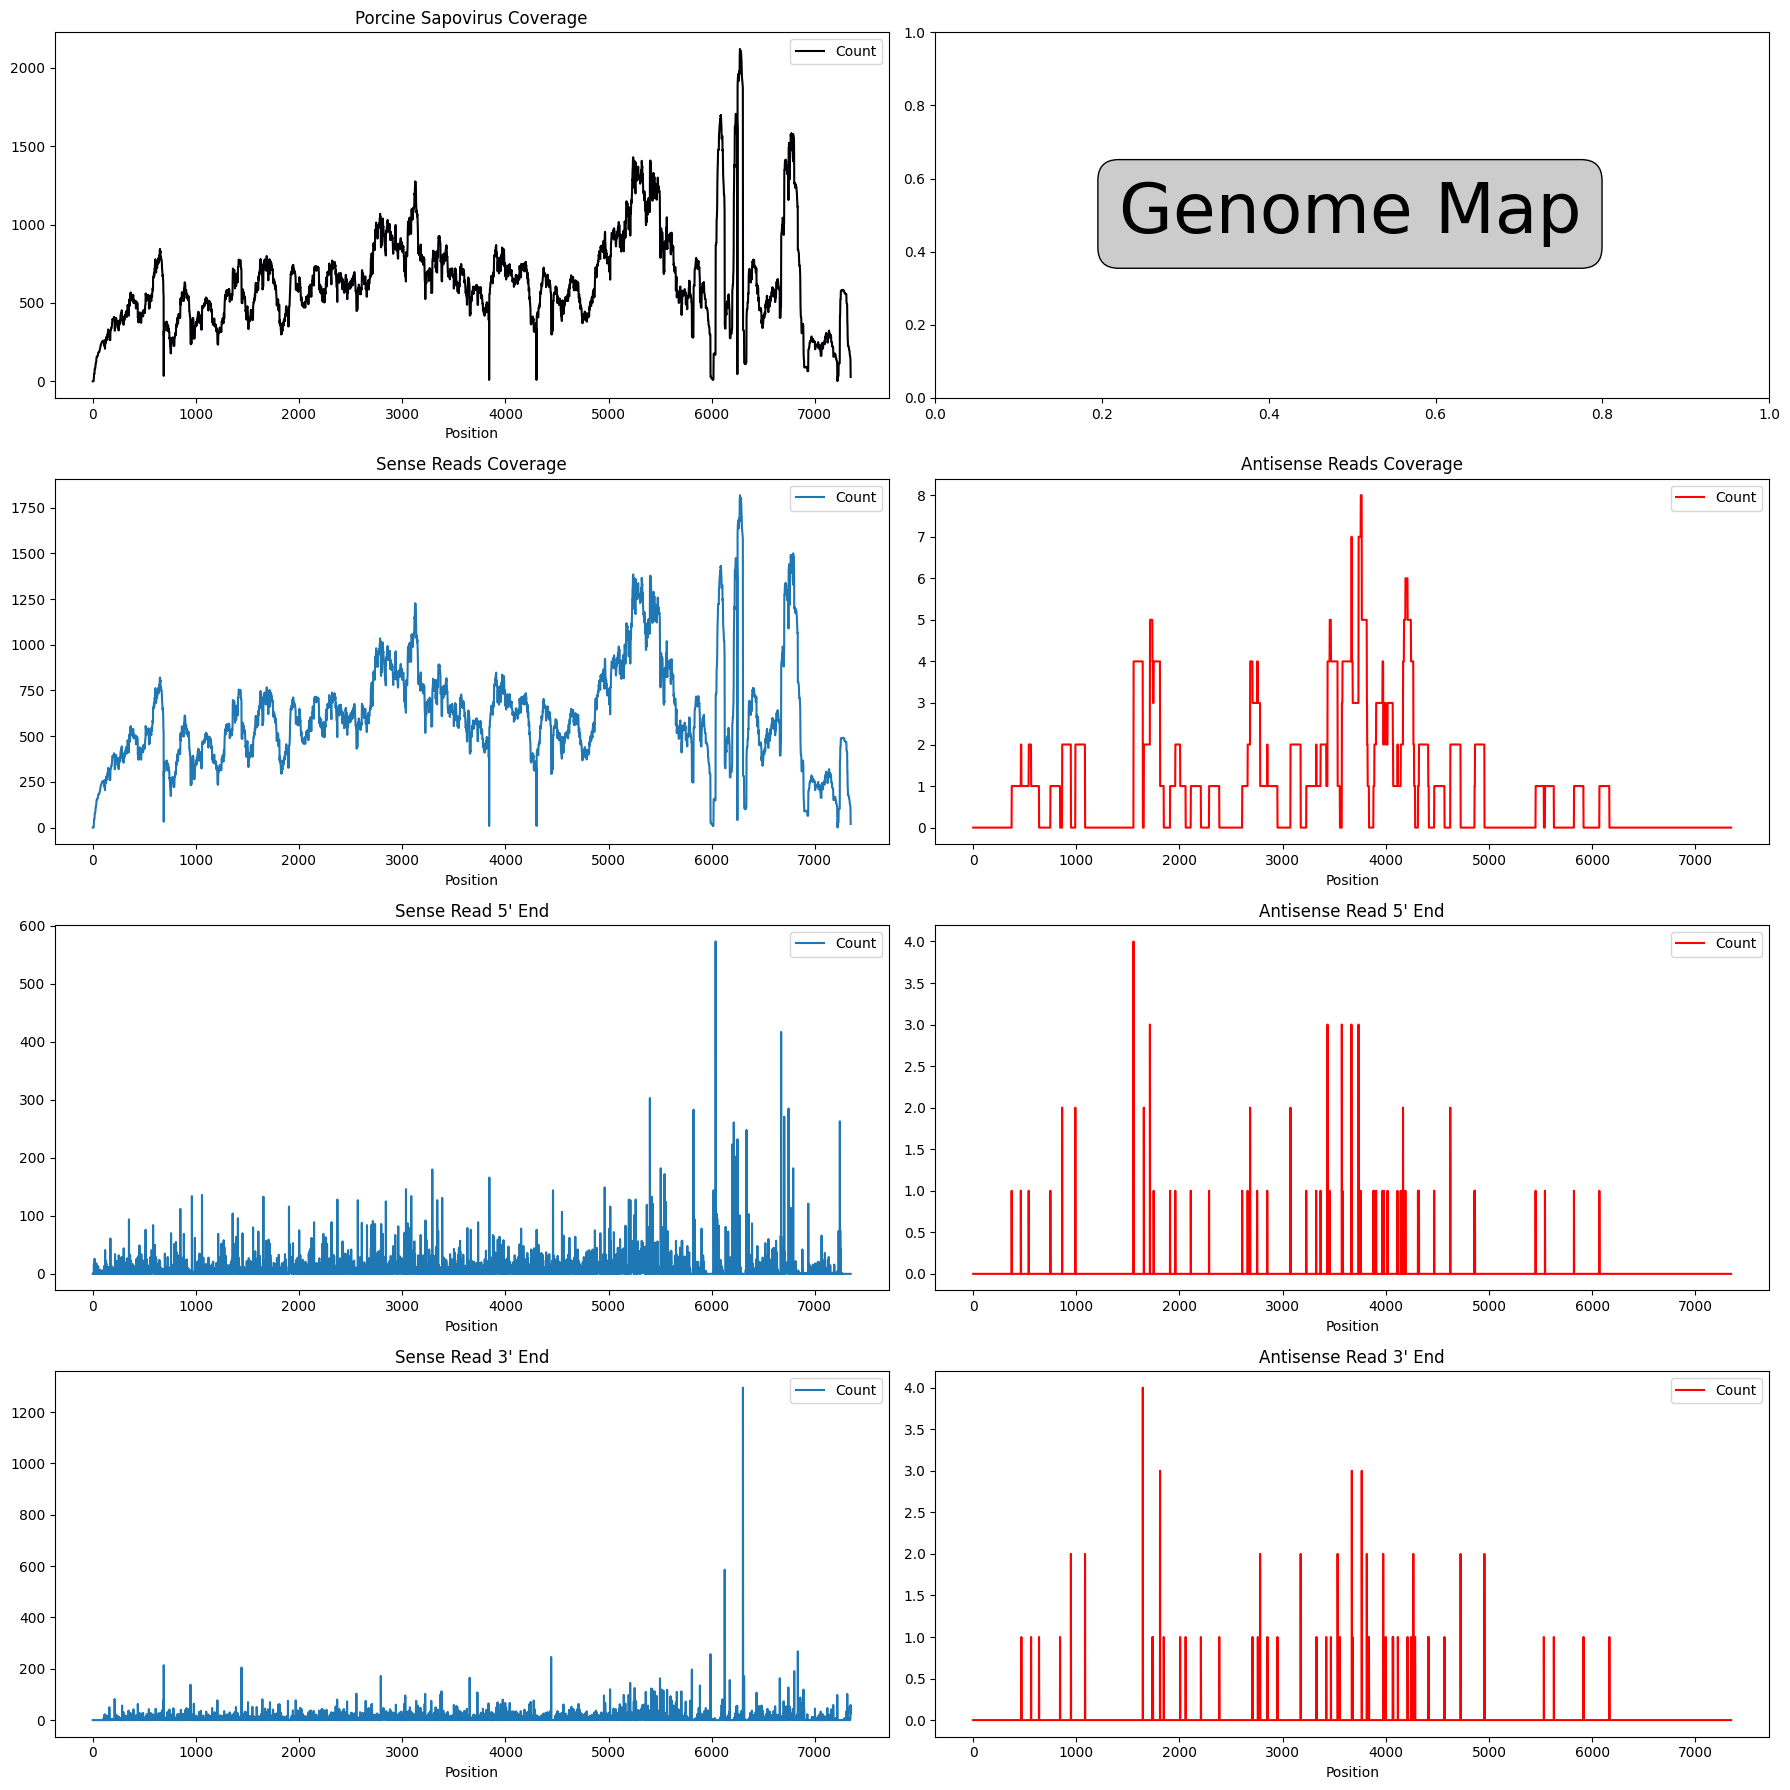

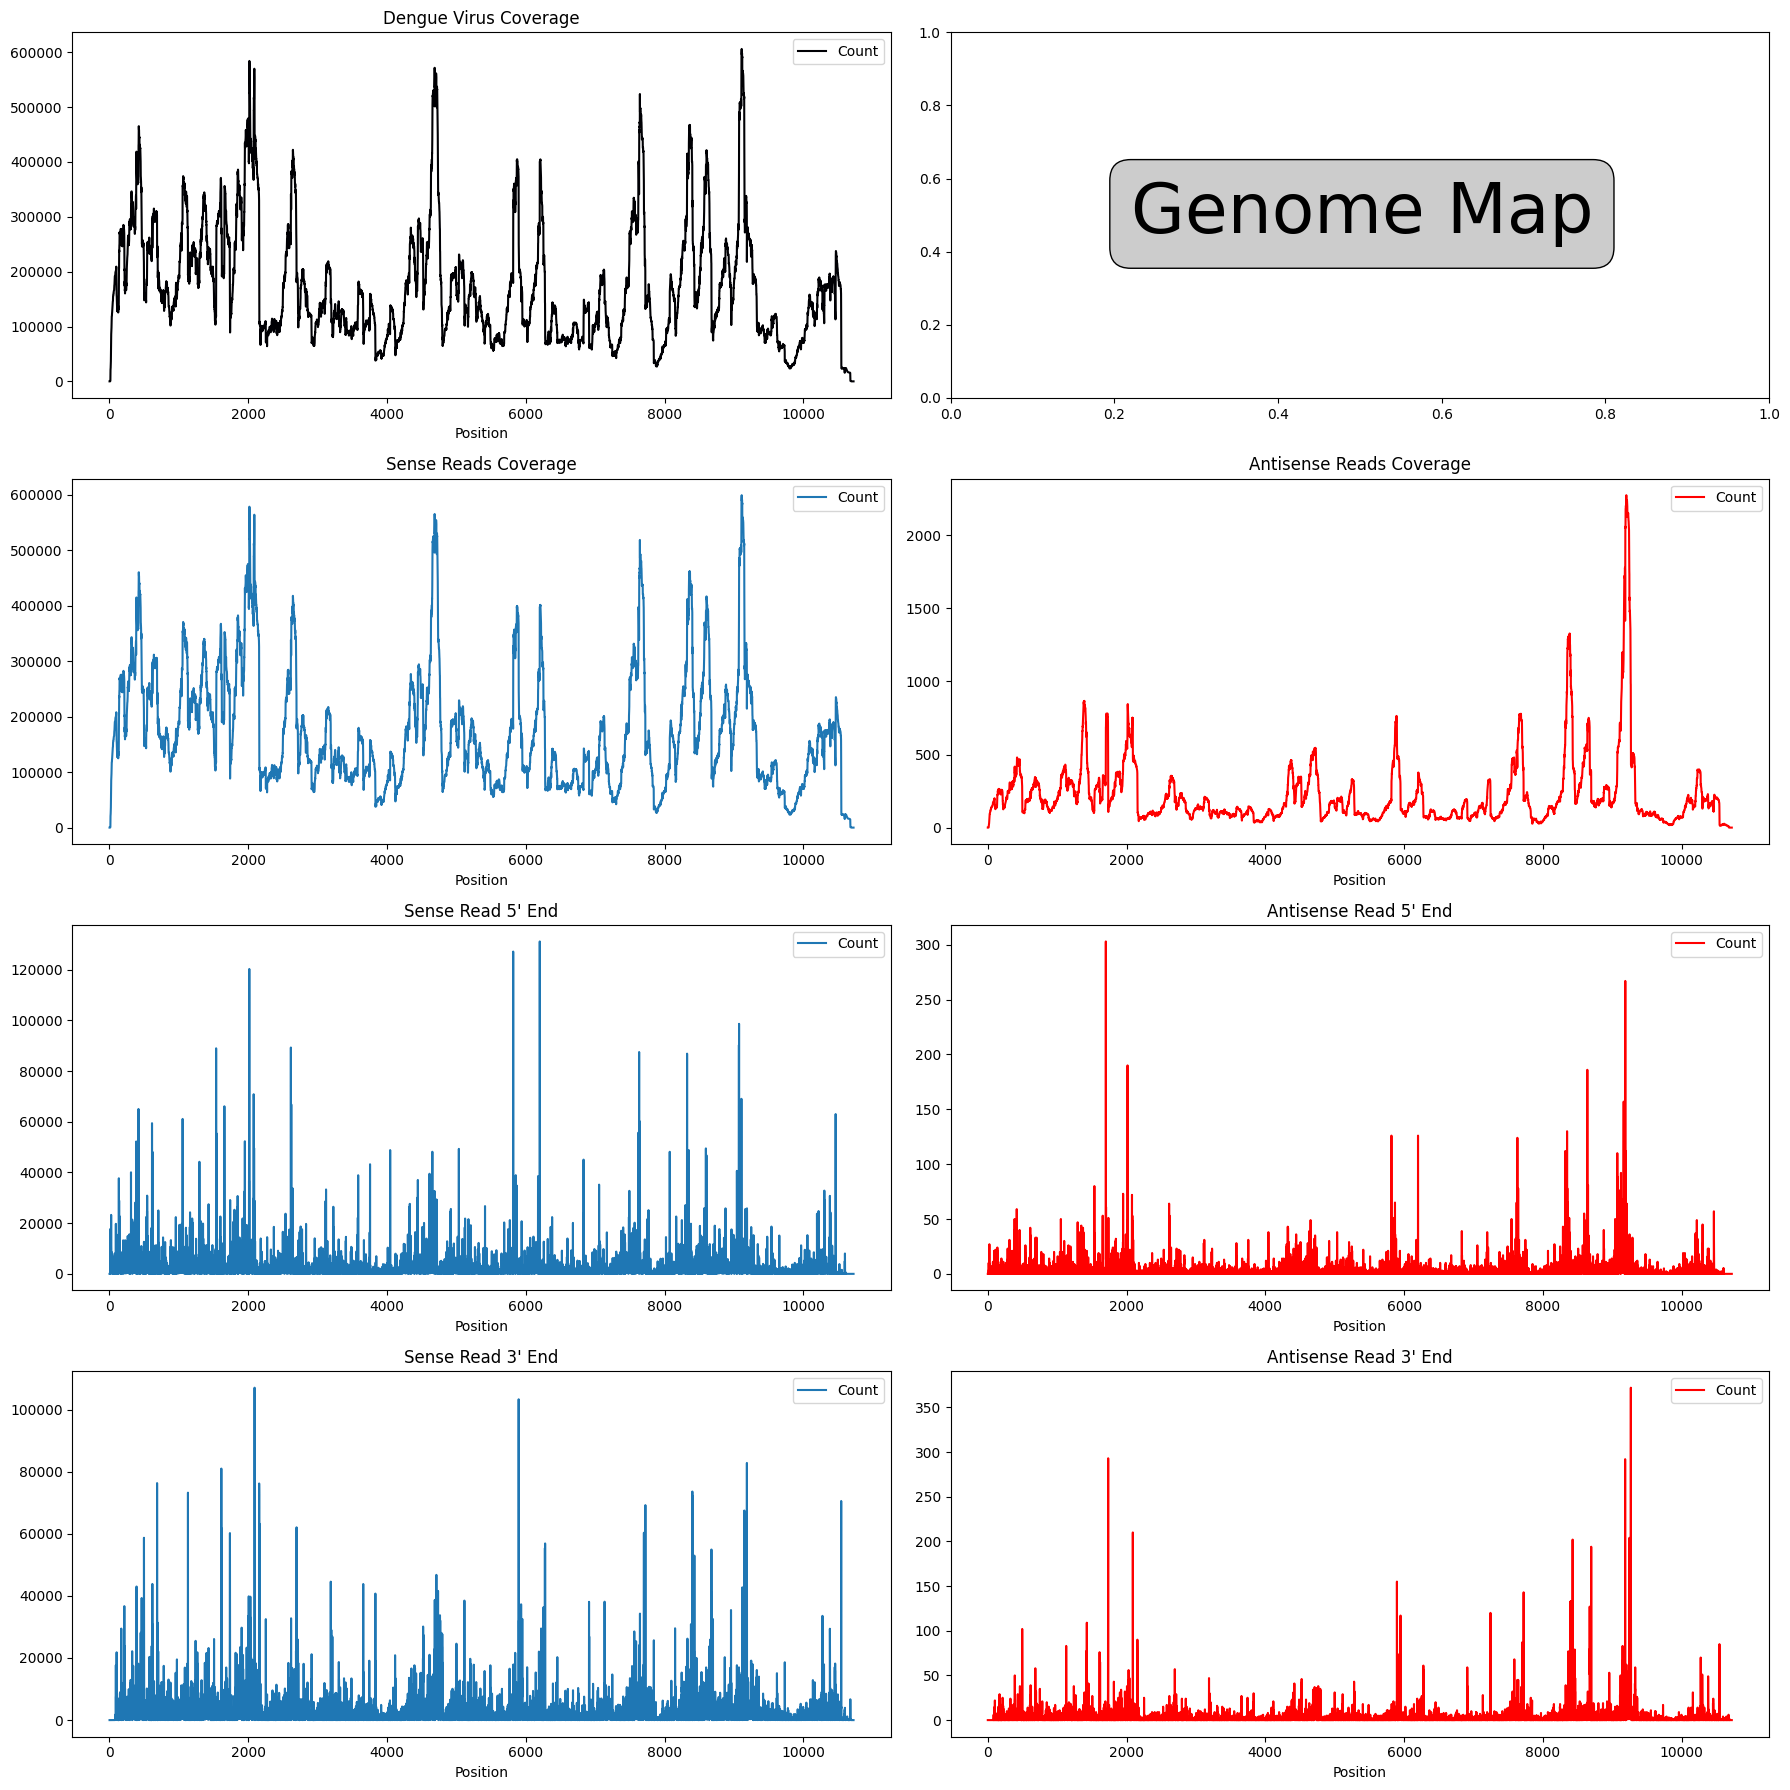

In [41]:
reference_virus = ["Zika Virus", "Zika Virus", "Zika Virus", "Feline Calicivirus", "Zika Virus",
                   "Murine Norovirus", "Porcine Sapovirus", "Porcine Sapovirus", "Dengue Virus"]

for i, acc in enumerate(acc_list):
    
    original_depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_start = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_end = pd.read_csv("/mnt/Subgenomic_plotting/plotting/negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])

    
    
    # Create a list of the dataframes for easy iteration
    dataframes = [original_depth, positive_depth, negative_depth, positive_start, negative_start, positive_end, negative_end]
    titles = [reference_virus[i] + " Coverage","Sense Reads Coverage","Antisense Reads Coverage",
              "Sense Read 5\' End","Antisense Read 5\' End", "Sense Read 3\' End", "Antisense Read 3\' End"]
    colours = ["magma",None, "autumn",None,"autumn",None, "autumn"]
    
    
    
    # Create subplots: 4 rows and 2 columns, but only using the first slot for a single graph
    fig = plt.figure()
    axs = []
    gs = gridspec.GridSpec(4, 2)
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[3, 0]))
    axs.append(plt.subplot(gs[3, 1]))
    axs.append(plt.subplot(gs[0, 1]))
    
    # Plot each DataFrame on its corresponding subplot
    for i, df in enumerate(dataframes):
        ax = axs[i]
        df.plot("Position", "Count", ax=ax, colormap=colours[i], figsize=(18, 18))
        ax.set_title(titles[i])

    axs[7].annotate("Genome Map", (0.22,0.45), fontsize=50, bbox=dict(boxstyle="round", fc="0.8"))
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    fig.savefig('/mnt/Subgenomic_plotting/final_plots/' + acc + '.png')